<hr style="height: 1px;">
<i>This notebook was authored by the 8.316x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Lesson 5: Uncertainty</h1>


<a name='section_5_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_1">L5.1 What Do We Call Uncertainty?</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_1">L5.1 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_2">L5.2 Extracting Uncertainty For Linear Fit</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_2">L5.2 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_3">L5.3 Computing Uncertainty</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_3">L5.3 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_4">L5.4 Introduction to Likelihood</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_4">L5.4 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_5">L5.5 An Example: Auger Data (Part 1)</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_5">L5.5 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_6">L5.6 An Example: Auger Data (Part 2)</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_6">L5.6 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_7">L5.7 Log-Likelihood and Chi-square</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_7">L5.7 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_8">L5.8 Minimizing</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_8">L5.8 Exercises</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_5_9">L5.9 Comparison Using lmfit</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#exercises_5_9">L5.9 Exercises</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>

In this Lesson, we are going to understand what uncertainty is, and how uncertainty is obtained. For this Lesson, we will focus on data from the Auger Experiment, which measures high energy cosmic rays.

We will explore the following topics:

- What are fit residuals?
- Extracting the fit uncertainty on parameters
- Likelihood
- Interpreting Likelihood
- Getting things to fit: Chi-by-eye and More

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook. 

If you're using a Colab cloud runtime, also run the cell labeled "for Colab users."

In [ ]:
#>>>RUN: L5.0-runcell00

!pip install lmfit

In [1]:
#>>>RUN: L5.0-runcell01

import numpy as np               #https://numpy.org/doc/stable/
import matplotlib.pyplot as plt  #https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html
import csv                       #https://docs.python.org/3/library/csv.html 
import math                      #https://docs.python.org/3/library/math.html
from scipy import stats          #https://docs.scipy.org/doc/scipy/reference/stats.html

In [ ]:
#>>>RUN: L5.0-runcell02

#importing data from git repository

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'data/L05' >> .git/info/sparse-checkout
!git pull origin main

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [2]:
#>>>RUN: L5.0-runcell02

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_5_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.1 What Do We Call Uncertainty?</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_0) | [Exercises](#exercises_5_1) | [Next Section](#section_5_2) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L05/slides_L05_01.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L5.1-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L05/slides_L05_01.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L05/slides_L05_01.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L05/slides_L05_01.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>What are Fit Residuals?</h3>

In the last Lesson, we fit the supernovae data, and got a pretty good fit for Hubble's constant. However, we didn't really try to understand how good our fit was, nor did we try to extract an uncertainty on the fit parameters. To understand what is going on, let's first look at our previous fit to the supernovae data and try to understand residuals. 

In [3]:
#>>>RUN: L5.1-runcell01

import numpy as np
import csv
import math

#Let's try to understand how good the fits we made in last Lesson are, let's load the supernova data again
label='data/sn_z_mu_dmu_plow_union2.1.txt'


def distanceconv(iMu):
    power=iMu/5+1
    return 10**power

def distanceconverr(iMu,iMuErr):
    power=iMu/5+1
    const=math.log(10)/5.
    return const*(10**power)*iMuErr

#Now let's zoom in on the small redshift data
def load(iLabel,iZMax):
    redshift=np.array([])
    distance=np.array([])
    distance_err=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter='\t')
        for row in plots:
            if float(row[1]) > iZMax:
                continue
            redshift = np.append(redshift,float(row[1]))
            distance = np.append(distance,distanceconv(float(row[2])))
            distance_err = np.append(distance_err,distanceconverr(float(row[2]),float(row[3])))
    return redshift,distance,distance_err

redshift=np.array([])
distance=np.array([])
distance_err=np.array([])
redshift,distance,distance_err = load(label,0.1)

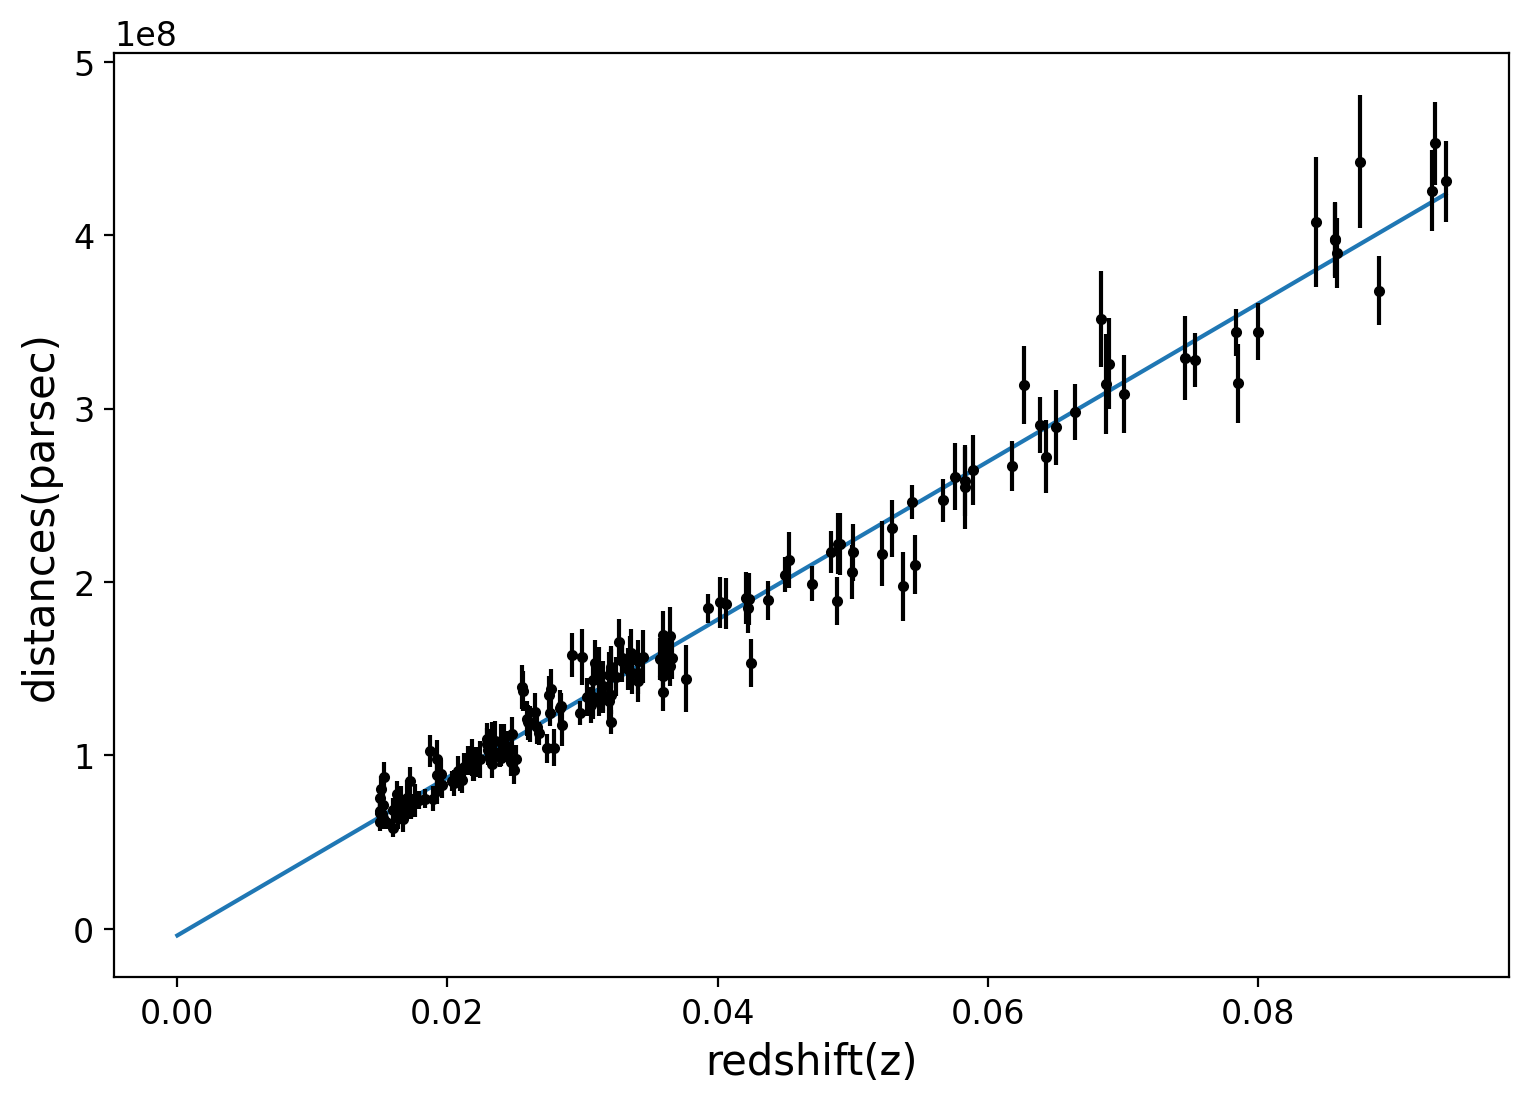

Hubbles Constant: 65.87381819553848 intercept -3931446.778206587


In [4]:
#>>>RUN: L5.1-runcell02

import matplotlib.pyplot as plt


#Now let's run the regression again
def variance(isamples):
    mean=isamples.mean()
    n=len(isamples)
    tot=0
    for pVal in isamples:
        tot+=(pVal-mean)**2
    return tot/n

def covariance(ixs,iys):
    meanx=ixs.mean()
    meany=iys.mean()
    n=len(ixs)
    tot=0
    for i0 in range(len(ixs)):
        tot+=(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/n

def linear(ix,ia,ib):
    return ia*ix+ib

def regress(redshift,distance):
    #Let's regress
    var=variance(redshift)
    cov=covariance(redshift,distance)
    A=cov/var
    b=distance.mean()-A*redshift.mean()
    #Done!
    return A,b

def plotAll(redshift,distance,distance_err,A,b):
    #now let's plot it
    xmax=np.max(redshift)
    xvals = np.linspace(0,xmax,100)
    yvals = []
    for pX in xvals:
        yvals.append(linear(pX,A,b))

    #Plot the line
    plt.plot(xvals,yvals)
    plt.errorbar(redshift,distance,yerr=distance_err,marker='.',linestyle = 'None', color = 'black')
    plt.xlabel('redshift(z)', fontsize=15) #Label x
    plt.ylabel('distances(parsec)', fontsize=15)#Label y
    plt.show()
    #Print it out
    print("Hubbles Constant:",1e6*3e5/A,"intercept",b)#Note 1e6 is from pc to Mpc and 3e5 is c in km/s

A,b=regress(redshift,distance)
plotAll(redshift,distance,distance_err,A,b)

Now that we have loaded and fit the data again, we would like to actually understand how good the fit is. To do that, we are going to define the residual in $y$. We can define this as 

$$
\begin{equation}
y^{resid}_{i} = f(x_{i})-y_{\rm true} = \hat{y}_{i}-y_{\rm true}
\end{equation}
$$

Alternatively, we could also divide the above by the uncertainty $\sigma$. For now, let's compute it for this data, and make a histogram.

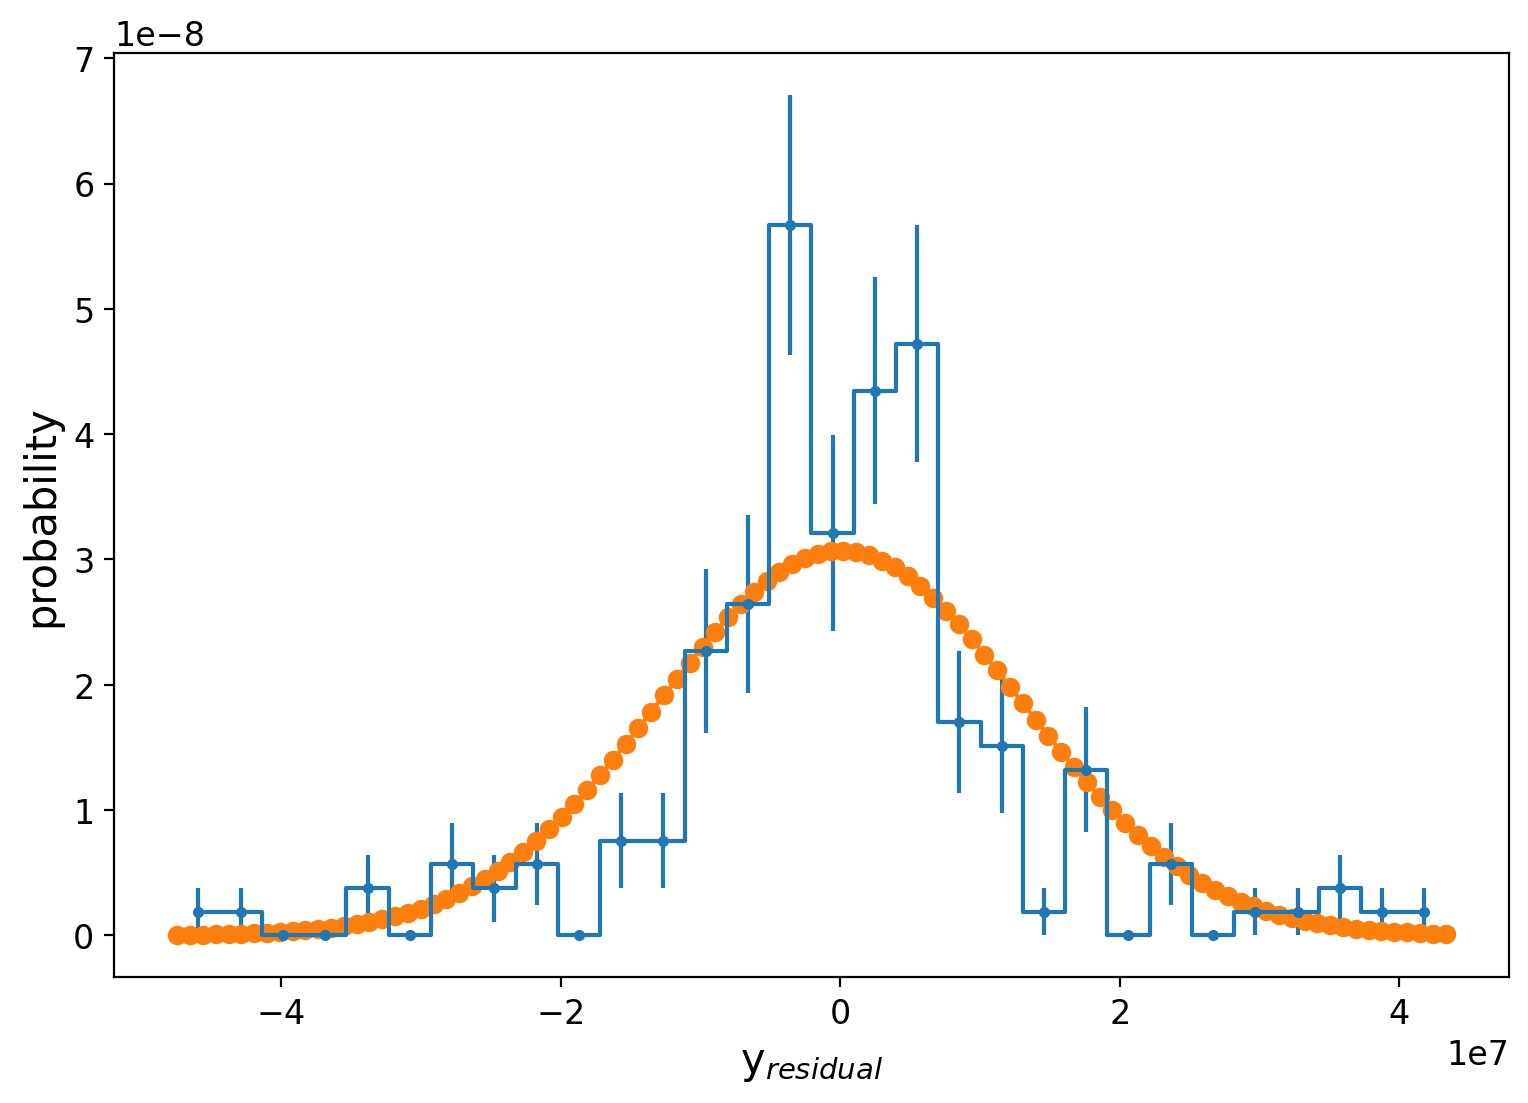

In [5]:
#>>>RUN: L5.1-runcell03

from scipy import stats

def residual(func,args,distance,distance_err=[]):
    residuals=np.array([])
    for i0 in range(len(redshift)):
        pResid=func(redshift[i0],args[0],args[1])-distance[i0]
        if len(distance_err) > 0:      
            pResid=pResid/distance_err[i0]
        residuals = np.append(residuals,pResid)
    return residuals

#This time we are going to look at a histogram of the residuals
def plotHist(residuals):
    y0, bin_edges = np.histogram(residuals, bins=30)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0=len(residuals)*(bin_edges[-1]-bin_edges[0])/30.
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid')
    
    #for good measure, let's compare this to a gaussian distribution
    k=np.linspace(bin_edges[0],bin_edges[-1],100)
    normal=stats.norm.pdf(k,0,residuals.std())
    plt.plot(k,normal,'o-')
    plt.xlabel("y$_{residual}$")
    plt.ylabel("probability")
    plt.show()
residuals=residual(linear,[A,b],distance)
plotHist(residuals)

So, you can see that our residual distribution looks somewhat like a normal (Gaussian) distribution. As a reminder, here is the analytic form of the normal distribution. 

$$
\begin{equation}
N(x,\mu,\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}
$$


It has these very important properties, which you can derive yourselves:  

$$
\begin{equation}
E[N(x,\mu,\sigma)]=\mu \\
V[N(x,\mu,\sigma)]=\sigma^2 \\
\end{equation}
$$


Now, recall from previous Lessons that the *distribution* of the sum of random numbers sampled from any distribution converges to a Gaussian distribution in the large $N$ limit. That means that the noise (i.e., the fluctuations) when taking large enough samples from any random set of distributions should be approximately Gaussian. This is a very powerful statement, that we will use again and again. 

<a name='exercises_5_1'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_1) | [Next Section](#section_5_2) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.1.1</span>

Consider the residual distribution found above, but now divide by the uncertainty of each measurement, that is, following the formula:

$$
\begin{equation}
y^{resid}_{i} = \frac{f(x_{i})-y_{true, i}}{\sigma_{y,i}}
\end{equation}
$$

If we plot this, and it is truly Gaussian, what are the *expected* values of the mean and stdev of the normalized residual distribution? Enter your answer as a list of two numbers with precision 1e-3: `[mean, stdev]`.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[0,1]
</pre>
        
**EXPLANATION:**
    
The `[mean,stdev]` of this Gaussian distribution should be `[0,1]`.
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.1.2</span>

Now use the data to compute the mean and standard deviation of the distribution defined by:

$$
\begin{equation}
y^{resid}_{i} = \frac{f(x_{i})-y_{true, i}}{\sigma_{y,i}}
\end{equation}
$$

**Hint: There is an option to do this in the function that we previously defined.**

How do the actual values compare to the values of an ideal Gaussian? Enter your answers found using the data as a list of two numbers with precision 1e-3: `[mean, stdev]`.


You may wish to use the starting code below.

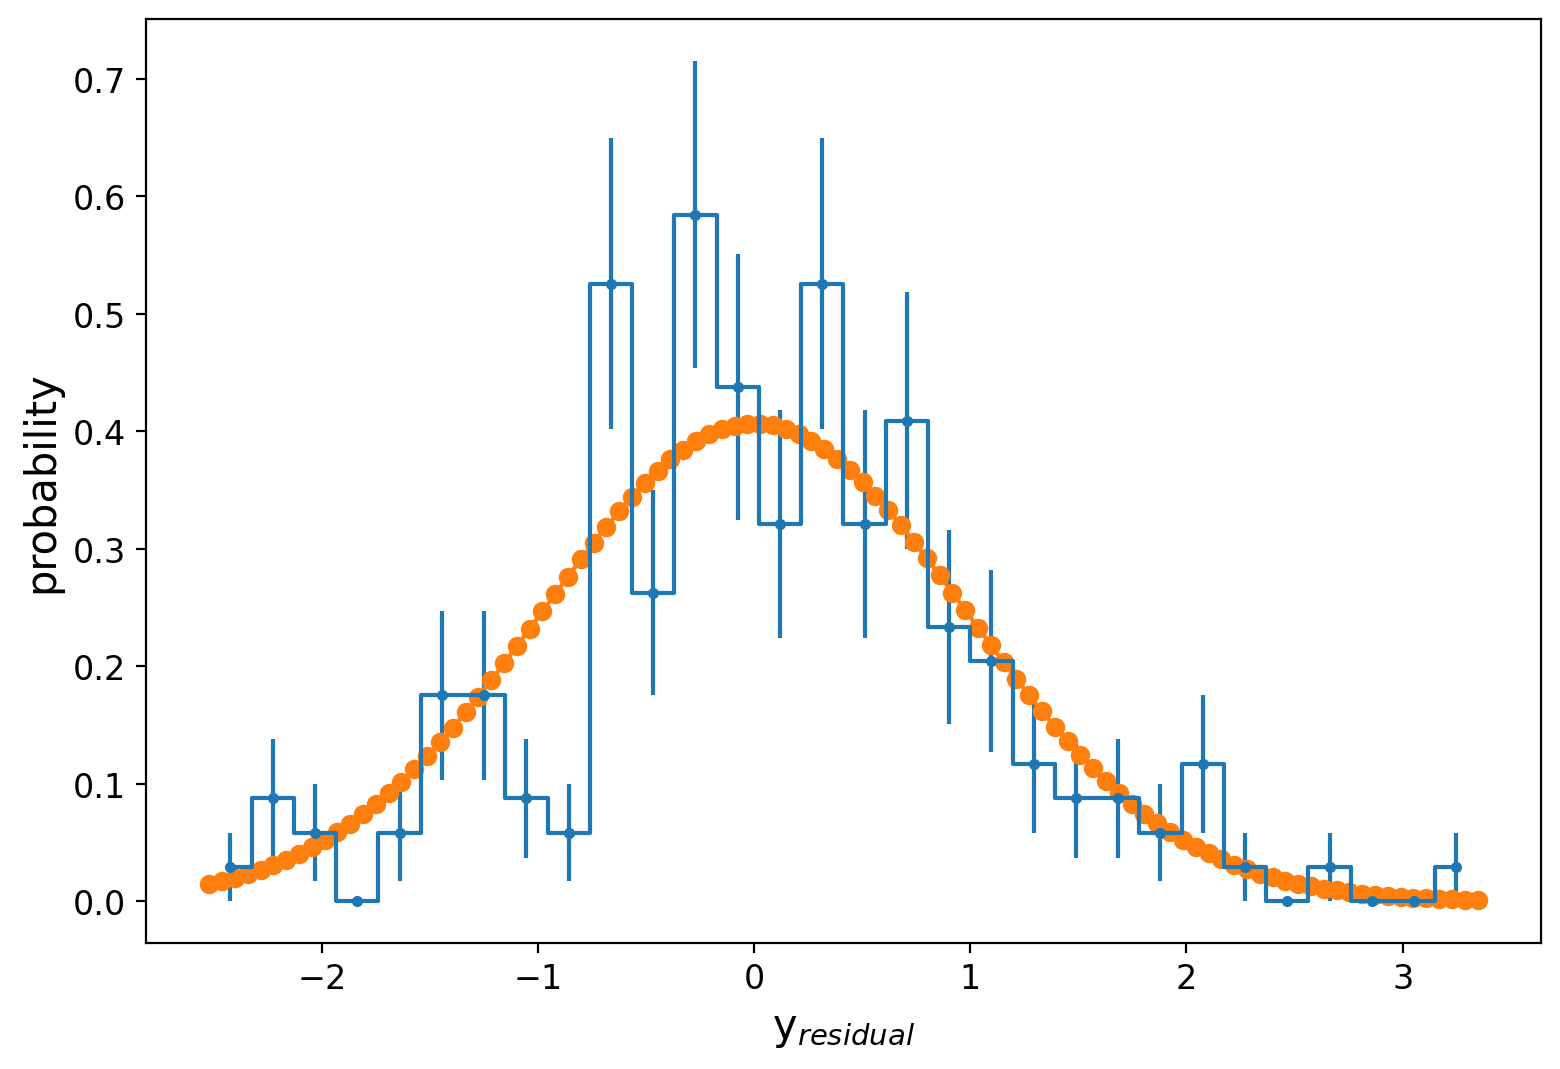

Ideally we should have a Gaussian with mean(residuals)=0 Instead we have 0.0674380962700456
Ideally we should have a Gaussian with std(residuals)=1. Instead we have 0.9807770453234462


In [6]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

residuals=residual(linear,[A,b],distance,distance_err)
plotHist(residuals)

print("Ideally we should have a Gaussian with mean(residuals)=0 Instead we have",residuals.mean())
print("Ideally we should have a Gaussian with std(residuals)=1. Instead we have",residuals.std())


In [ ]:
#>>>SOLUTION

residuals=residual(linear,[A,b],distance,distance_err)
plotHist(residuals)

print("Ideally we should have a Gaussian with mean(residuals)=0 Instead we have",residuals.mean())
print("Ideally we should have a Gaussian with std(residuals)=1. Instead we have",residuals.std())


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[0.067,0.981]
</pre>
        
**EXPLANATION:**
        
From the above exercise, we see that the residuals are very close to a perfect Gaussian distribution. This means that our uncertainties are very well determined. It's not always the case that this is true. Often experimentalists will overestimate their uncertainties yielding the scenario where the standard deviation is significantly less than $1$ since $\sigma$ is too large.

</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.1.3</span>

Load the supernova data for entries up to a redshift of 0.2. You can do that by completing the line of code below. Now, compute the residuals dividing by the error, as above. What is the mean and RMS of the residuals now? Why are the residuals not a Gaussian shape? 

Enter your answer as a list of two numbers with precision 1e-3: `[mean, stdev]`.

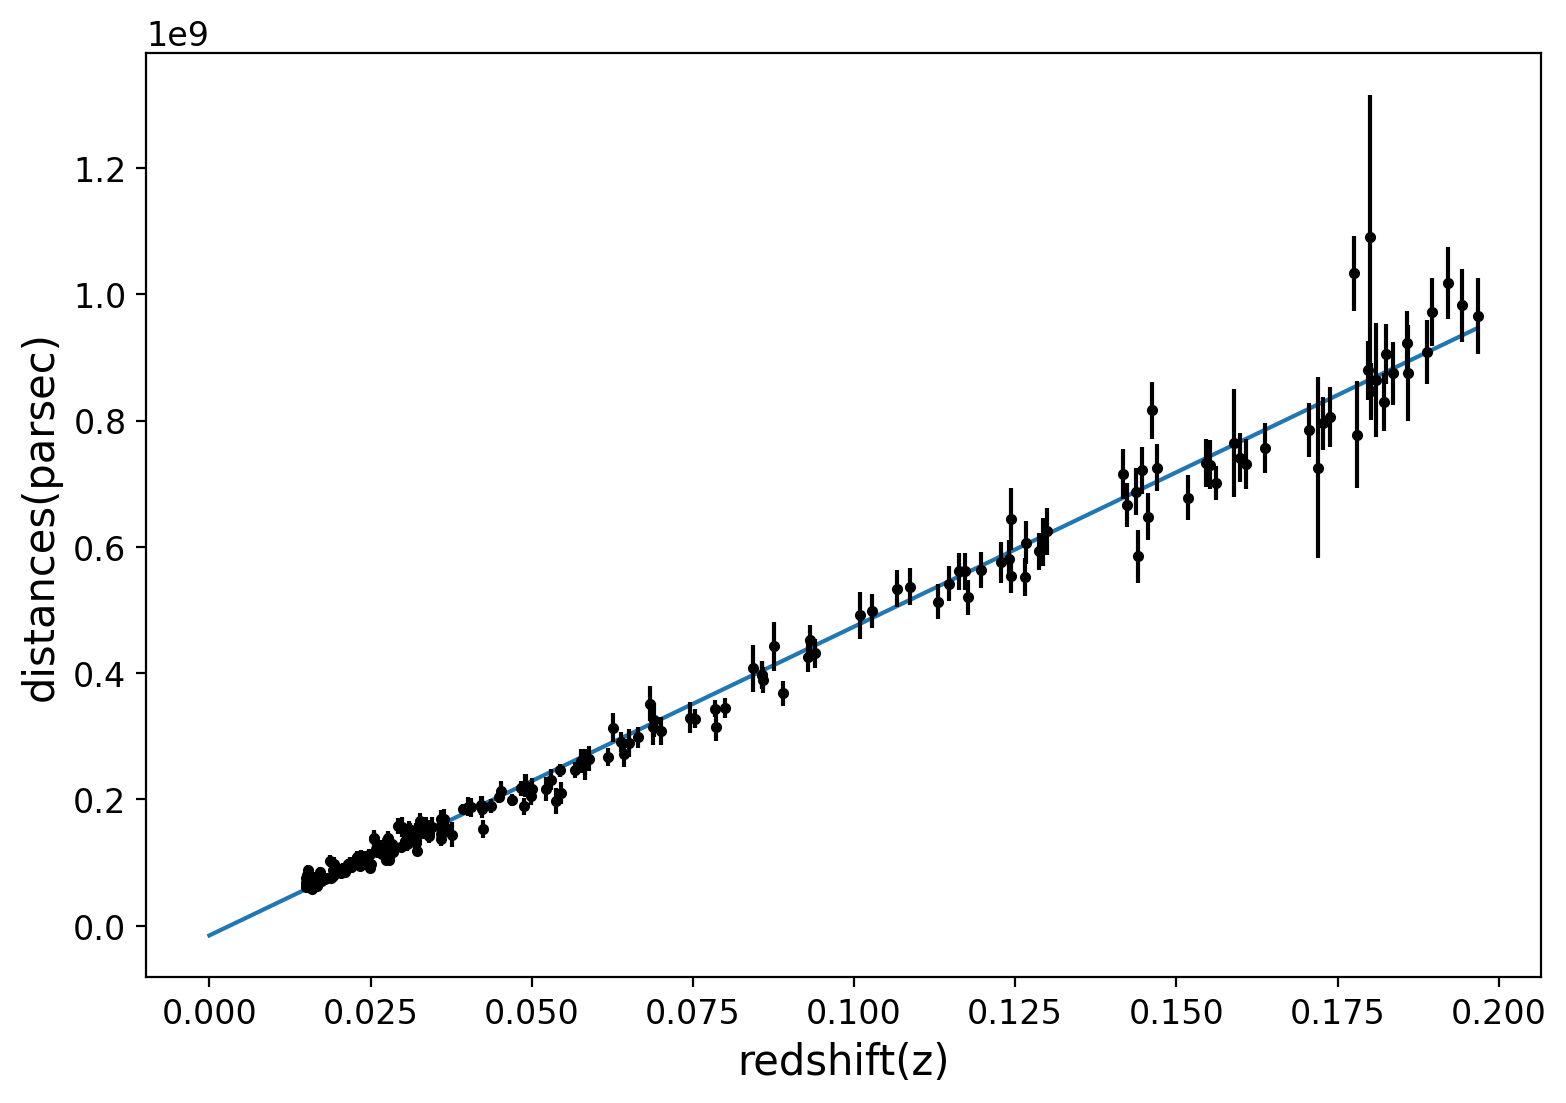

Hubbles Constant: 61.33722762468106 intercept -15524463.91191703


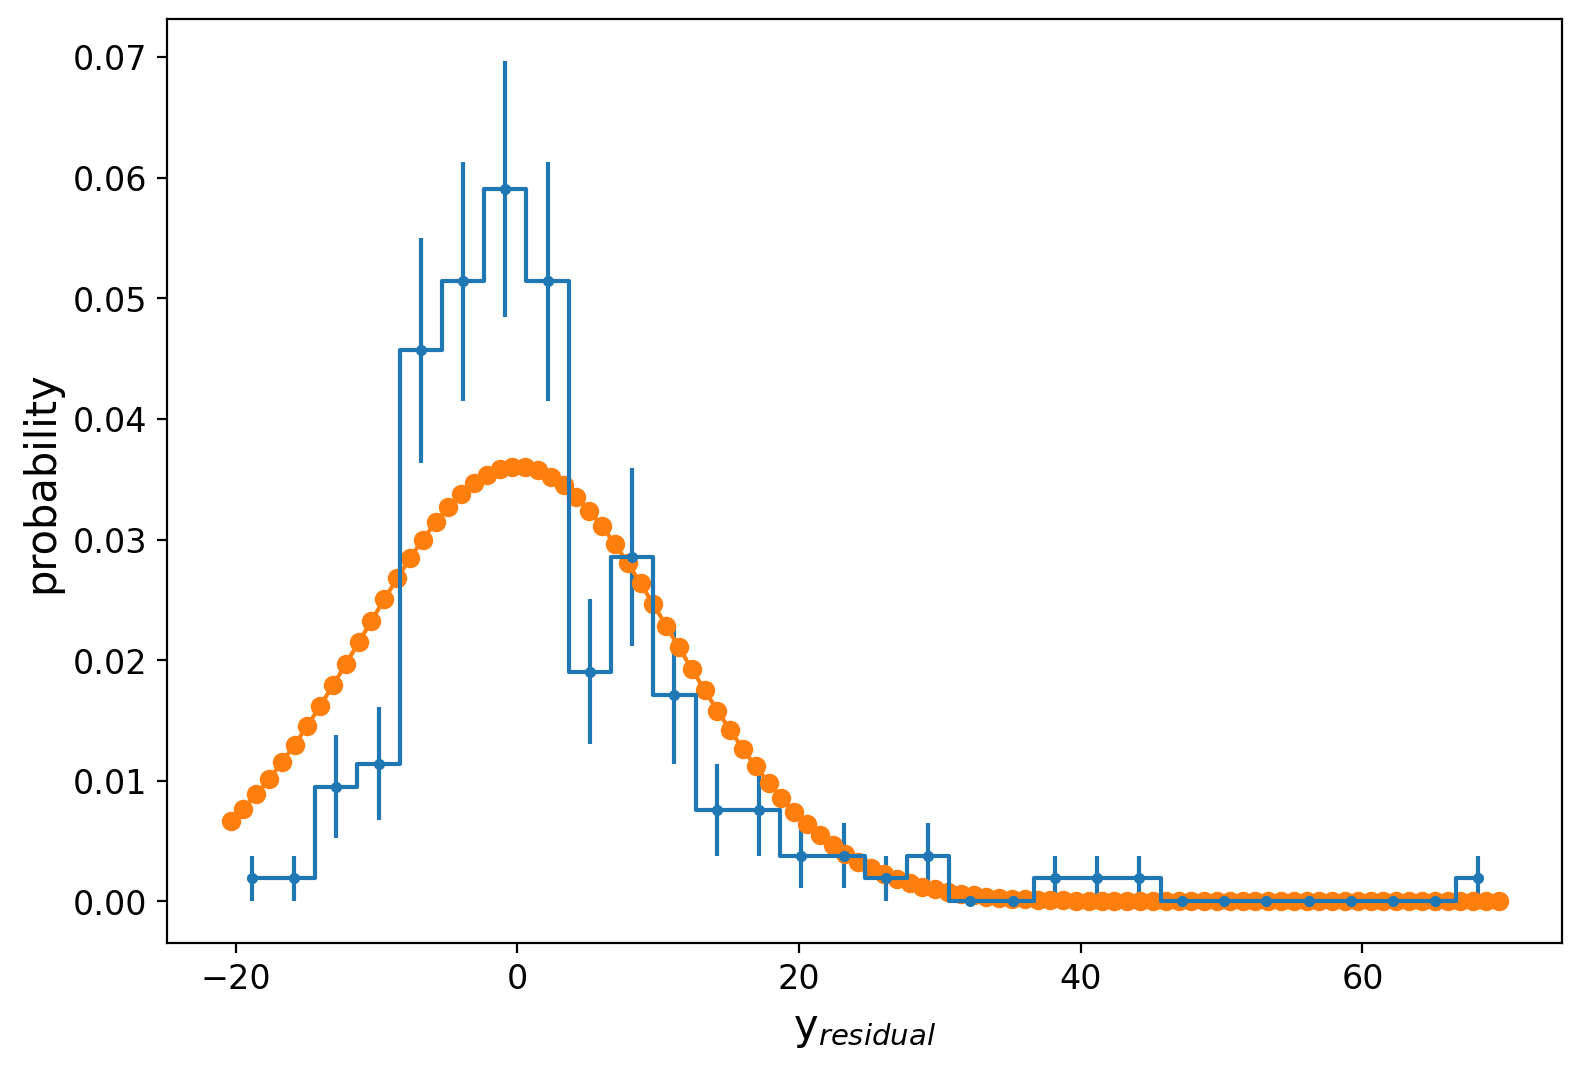

Ideally we should have a Gaussian with mean(residuals)=0 Instead we have 2.171146849379445
Ideally we should have a Gaussian with std(residuals)=1. Instead we have 11.06815596117677


In [7]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

redshift02,distance02,distance02_err = load(label,0.2)

#Find these parameters by running the regression using regress()
A02,b02=regress(redshift02,distance02)

plotAll(redshift02,distance02,distance02_err,A02,b02)

#plot regression to check
residuals02=residual(linear,[A02,b02],distance02,distance02_err)
plotHist(residuals02)

print("Ideally we should have a Gaussian with mean(residuals)=0 Instead we have",residuals02.mean())
print("Ideally we should have a Gaussian with std(residuals)=1. Instead we have",residuals02.std())


In [ ]:
redshift02,distance02,distance02_err = load(label,0.2)
A02,b02=regress(redshift,distance)
plotAll(redshift02,distance02,distance02_err,A02,b02)

residuals02=residual(linear,[A02,b02],distance02,distance02_err)
plotHist(residuals02)

print("Ideally we should have a Gaussian with mean(residuals)=0 Instead we have",residuals02.mean())
print("Ideally we should have a Gaussian with std(residuals)=1. Instead we have",residuals02.std())

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[2.1624047,10.581414]
</pre>
        
**EXPLANATION:**

The distribution is not Gaussian anymore because the higher redshift seems to have a non-linear dependence. This is indicative of a problem in the choice of fit function, maybe a linear dependence is not sufficient to describe the data!

</div>


<a name='section_5_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.2 Extracting Uncertainty For Linear Fit</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_1) | [Exercises](#exercises_5_2) | [Next Section](#section_5_3) |


<h3>Overview</h3>

Now, given the residuals above for our fit, we would like to deduce the variance of the parameters $A$ and $b$. For a linear regression, we can do this analytically (i.e., with math). We need two new definitions for the derivation.

First, define the residual sum of squares, often referred to as the RSS. It is defined as 

$$
\begin{eqnarray}
\rm{RSS} & = & \sum_{i=1}^{N} \left(y_{i} - f\left(x_{i})\right) \right)^2
         & = & \sum_{i=1}^{N} \left(y_{i} - Ax_{i}-b \right)^2
\end{eqnarray}
$$

Furthermore, we can define the mean squared error($\hat{\sigma}_{\rm{MSE}}$) as the average of the RSS. 

$$
\begin{eqnarray}
\hat{\sigma}_{\rm{MSE}} & = & \frac{1}{N-2}\sum_{i=1}^{N} \left(y_{i} - f\left(x_{i})\right) \right)^2
                        & = & \frac{1}{N-2}\sum_{i=1}^{N} \left(y_{i} - Ax_{i}-b \right)^2
\end{eqnarray}
$$

Here, we don't divide by $N$ because of the fact that $A$ and $b$ are determined from the data, and thus are actually not free parameters, thus removing 2-degrees of freedom in the data. To understand this, imagine what $\hat{\sigma}_{\rm{MSE}}$  would be if you fit 2 points. It would be exactly 0 since the line $f(x)$ would just connect the two points, so in fact there are no degrees of freedom of variance. A third point would thus fluctuate about the line with an MSE consistent with one point fluctuations. 

Now, we want to compute the variance of $A$. To understand the variance calculation, we need to consider which variables are random and which are not. In a linear regression, we fit $f(x_{i})$ with the understanding it cannot predict $y_{i}$ perfectly. However, $x_{i}$ are defined in this construction to be fixed, true numbers. As a consequence, we can consider $y_{i}$ the one true random variable, with a variance defined as $\rm{RSS}$. 


To get the variance on $A$ we can use the variance in $y_{i}$. The way to think about this is that $y_{i}=\hat{y}_{i}+u_{i}$ where $u_{i}$ is a random variable defining the variation of the observed $y_{i}$ with respect to the result predicted by the fit. 

Now, let's go back to the definition of $A$ from earlier:

$$
\begin{eqnarray}
   A & = &  \frac{\frac{1}{N} \sum_{i=1}^{N} \left(x_{i}-\bar{x}\right) \left(y_{i}-\bar{y}\right)}{\frac{1}{N} \sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2} \\
     & = & \sum_{i=1}^{N}  \frac{\left(x_{i}-\bar{x}\right)}{\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2}   \left(y_{i}-\bar{y}\right)\\
     & = & \sum_{i=1}^{N}  w_{i} \left(y_{i}-\bar{y}\right)
\end{eqnarray}   
$$


where we have written the first bit as a weight $w_{i}$ for brevity. Now, let's compute the variance of this as

$$
\begin{eqnarray}
  \rm{Var}(A) & = & \rm{Var} \left(\sum_{i=1}^N (w_iy_i-w_i\bar y)\right) \\
  & = & \rm{Var} \left(\sum_{i=1}^N w_iy_i\right) -  \rm{Var} \left(\bar{y}\sum_{i=1}^N w_i\right)  = \sum_{i=1}^N\rm{Var}(w_iy_i)\\
  & = & \sum_{i=1}^N w_i^2 \rm{Var}(y_i)
\end{eqnarray}
$$

where we have used properties of variance and the fact that the quantities $w_i$ are fixed — the $x_i$ are fixed numbers and $\bar x$ is a constant. We also used the fact that $\sum_{i=1}^{N} w_{i} = \sum_{i=1}^{N}(x_{i}-\bar{x}) = 0$ since $\bar y$ is a single number in our context. Thus, we have that the variance of the above will just be proportional to the variance of the one number $y_{i}$ about its prediction $\hat{y}_{i}$.

Noting that on average, we can write $\mathrm{Var}(y)=\left(y_{i}-\hat{y}_{i}\right)^2$, we then get the variance of $A$ as a weighted sum of the variance in $y$. 


$$
\begin{eqnarray}
  \rm{Var}(A) & = & \sum_{i=1}^{N}  w^{2}_{i} \left(y_{i}-\hat{y_{i}}\right)^2 \\
              & = & \sum_{i=1}^{N}  w^{2}_{i} \rm{Var}(y) \\
              & = & \sum_{i=1}^{N}  \left(\frac{\left(x_{i}-\bar{x}\right)}{\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2}\right)^2 \rm{Var}(y) \\
              & = & \frac{\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2}{\left(\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2\right)^2} \rm{Var}(y) \\
              & = & \frac{1}{\left(\sum_{i=1}^{N} \left(x_{i}-\bar{x}\right)^2\right)} \rm{Var}(y) \\
              & = & \frac{1}{N\rm{Var}(x)} \rm{Var}(y) \\
              & \rightarrow & \frac{1}{N-2}\frac{\rm{Var}(y)}{\rm{Var}(x)} 
\end{eqnarray}
$$

where, in the last step, we have reduced $N\rightarrow N-2$ to account for the fact that $A$ and $b$ are determined from the fit. We can then write the variance of $b$ noting:

$$
\begin{eqnarray}
b           & = & \bar{y} - A\bar{x} \\ 
\rm{Var}(b) & = & \rm{Var}(\bar{y}) + \rm{Var}(A)\bar{x}^2 \\
            & = & \frac{1}{N} \rm{Var}(y) + \rm{Var}(A)\bar{x}^2  
\end{eqnarray}
$$


Recall again that $\bar{x}$ is not a random variable and so has no variance. Let's now calculate the uncertainties on $A$ and $b$. 


<a name='exercises_5_2'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_2) | [Next Section](#section_5_3) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 5.2.1</span>

Consider a fourth-order polynomial:

$$f(x) = a_{4} x^4 + a_{3} x^3 + a_{2} x^2 + a_{1} x + a_{0}$$  

If we are using this as our fit function for data consisting of `N` points, how many degrees of freedom do we have? Express your answer in terms of `N`.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
N-5
</pre>
  
**EXPLANATION:**
    
The fit function has 5 parameters, so we have N-5 free points (degrees of freedom).
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Exercise 5.2.2</span>

For the linear function in the example above, the variance in $A$ was expressed as: $\rm{Var}(A)=\frac{1}{N-2}\frac{\rm{Var}(y)}{\rm{Var}(x)}$.

What is the variance in $b$, expressed in terms of $\rm{Var}(y)$,  $\rm{Var}(x)$, $\bar{x}$, and $N$? Use the appropriate degrees of freedom, and express $\rm{Var}(y)$ as `Vary`, $\rm{Var}(x)$ as `Varx`, and $\bar{x}$ as $xbar$.

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
'Vary/(N-2) * (1 + xbar^2/Varx)'
</pre>
  
**EXPLANATION:**
    
Use the definition of $\rm{Var}(b) = \frac{1}{N-2} \rm{Var}(y) + \rm{Var}(A)\bar{x}^2 $, and the expression for $\rm{Var}(A)$.
    
</div>


<a name='section_5_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.3 Computing Uncertainty</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_2) | [Exercises](#exercises_5_3) | [Next Section](#section_5_4) |


<h3>Overview</h3>

Let's compute the uncertainties.


In [8]:
#>>>RUN: L5.3-runcell01

residuals=residual(linear,[A,b],distance)
VarY=np.sum(residuals**2)/(len(redshift)-2)
VarA=VarY/variance(redshift)/(len(redshift)-2)
Varb=VarA*(redshift.mean())**2+VarY/(len(redshift)-2)
print("Hubbles Constant:",1e6*3e5/A,"+/-",1e6*3e5*math.sqrt(VarA)/A/A,"intercept",b,"+/-",math.sqrt(Varb))#Note 1e6 is from pc to Mpc and 3e5 is c in km/s


Hubbles Constant: 65.87381819553848 +/- 0.7266073085123292 intercept -3931446.778206587 +/- 2059027.4314163604


Using our findings, we can write the weighted regression uncertainties. We will skip the full derivation and write the answer. The best fit parameters for the weighted regression are


$$
\begin{eqnarray}
 \bar{y}_{w} & = & \frac{\sum_{i=1}^{N} \frac{y_{i}}{\sigma_{i}^2}}{\sum_{i=1}^{N} \frac{1}{\sigma_{i}^{2}} } \\
 \bar{x}_{w} & = & \frac{\sum_{i=1}^{N} \frac{x_{i}}{\sigma_{i}^2}}{\sum_{i=1}^{N} \frac{1}{\sigma_{i}^{2}} } \\
 A           & = &  \frac{\frac{1}{N} \sum_{i=1}^{N} \frac{1}{\sigma_{i}^{2}}\left(x_{i}-\bar{x}_{w}\right) \left(y_{i}-\bar{y}_{w}\right)}{\frac{1}{N} \sum_{i=1}^{N} \frac{1}{\sigma_{i}^{2}} \left(x_{i}-\bar{x}_{w}\right)^2} \\
b            & = & \bar{y}_{w} - A\bar{x}_{w}
\end{eqnarray}
$$

and the variance for these parameters can be written below as

$$
\begin{eqnarray}
  \sigma^{2}     & = & \frac{1}{N-2}\sum_{i=1}^{N} \frac{1}{\sigma_{i}^{2}} \left(y_{i} - Ax_{i}-b\right)^2 \\
  \sigma^{2}_{A} & = & \frac{\sigma^{2}}{\sum_{i=1}^{N}\frac{1}{\sigma_{i}^{2}} \left(x_{i}-\bar{x}_{w}\right)^2} \\
  \sigma^{2}_{b} & = & \left(\frac{1}{\sum_{i=1}^{N}\frac{1}{\sigma_{i}^{2}}}+\frac{\bar{x}^2_w}{\sum_{i=1}^{N}\frac{1}{\sigma_{i}^{2}}\left(x-\bar{x}_{w}\right)^2}\right)\sigma^2
\end{eqnarray}
$$


These very much parallel the variances of the parameters except now we have weighted the various events to reflect their respective uncertainties in the measurement. Let's see how our weighted best fit result changes the value of Hubble's constant. 


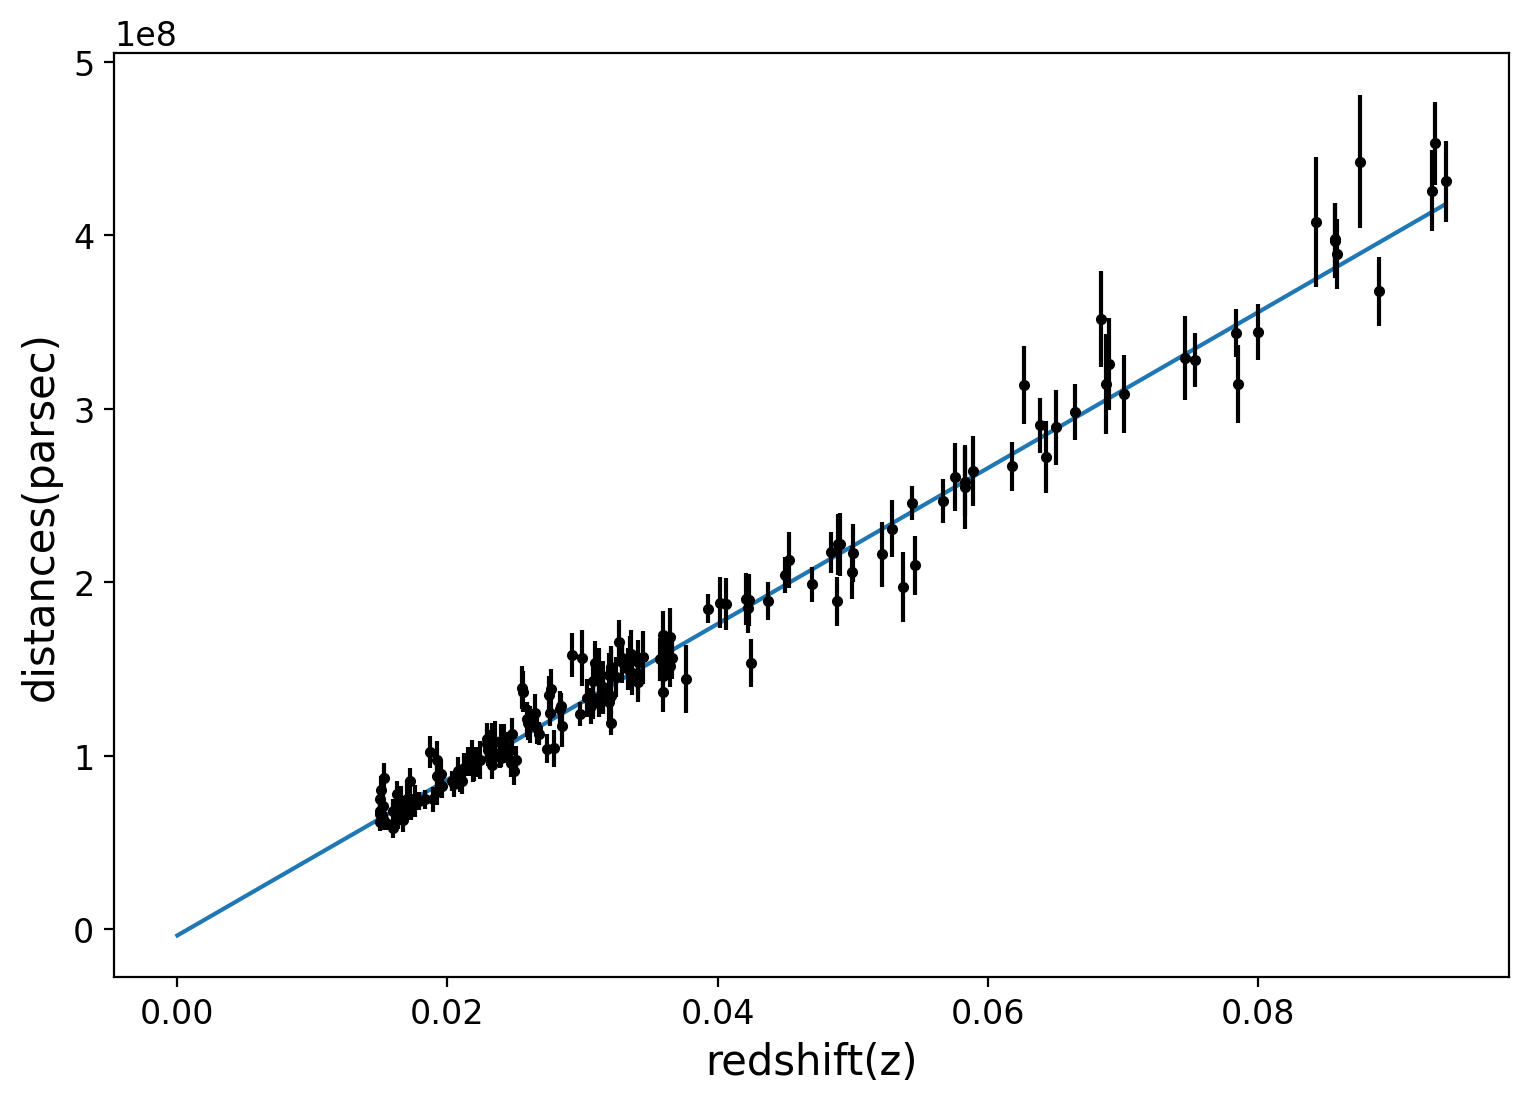

Hubbles Constant: 66.84173202572255 intercept -3501821.361192003
Weighted Hubbles Constant: 66.84173202572255 +/- 0.8288757665518472 intercept -3501821.361192003 +/- 1587583.9847322337

Unweighted Hubbles Constant: 65.87381819553848 +/- 0.7266073085123292 intercept -3931446.778206587 +/- 2059027.4314163604


In [9]:
#>>>RUN: L5.3-runcell02

weights=np.array([])
for pVal in distance_err:
    weights = np.append(weights,1./pVal/pVal)

#Now let's do it with weights
def variance_w(isamples,iweights):
    mean=np.average(isamples,weights=iweights)
    sumw=np.sum(iweights)
    tot=0
    for i0 in range(len(isamples)):
        tot+=iweights[i0]*(isamples[i0]-mean)**2
    return tot/sumw

def covariance_w(ixs,iys,iweights):
    meanx=np.average(ixs,weights=iweights)
    meany=np.average(iys,weights=iweights)
    sumw=np.sum(iweights)
    tot=0
    for i0 in range(len(ixs)):
        tot+=iweights[i0]*(ixs[i0]-meanx)*(iys[i0]-meany)
    return tot/sumw

def regress_w(redshift,weights,distance):
    varw=variance_w(redshift,weights)
    covw=covariance_w(redshift,distance,weights)
    Aw=covw/varw
    bw=np.average(distance,weights=weights)-Aw*np.average(redshift,weights=weights)
    return Aw,bw

Aw,bw=regress_w(redshift,weights,distance)
plotAll(redshift,distance,distance_err,Aw,bw)

def resid_w(func,args,distance,weights):
    residualsw=np.array([])
    for i0 in range(len(redshift)):
        pResid=linear(redshift[i0],args[0],args[1])-distance[i0]
        residualsw = np.append(residualsw,weights[i0]*pResid**2)
    return residualsw

residualsw = resid_w(linear,[Aw,bw],distance,weights)
sumw=np.sum(weights)
rsw=np.average(redshift,weights=weights)
sigmaw=np.sum(residualsw)/(len(redshift)-2)
VarAw=sigmaw*1./variance_w(redshift,weights)*1./sumw
Varbw=VarAw*(rsw)**2+sigmaw/sumw
    
print("Weighted Hubbles Constant:",1e6*3e5/Aw,"+/-",1e6*3e5*math.sqrt(VarAw)/Aw/Aw,"intercept",bw,"+/-",math.sqrt(Varbw))#Note 1e6 is from pc to Mpc and 3e5 is c in km/s
print()

#Now the previous
print("Unweighted Hubbles Constant:",1e6*3e5/A,"+/-",1e6*3e5*math.sqrt(VarA)/A/A,"intercept",b,"+/-",math.sqrt(Varb))#Note 1e6 is from pc to Mpc and 3e5 is c in km/s


<a name='exercises_5_3'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_3) | [Next Section](#section_5_4) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.3.1</span>

Why is the weighted Hubble's constant different from the unweighted one? Select the best answer below:

- Points with larger uncertainty pull on the fit-line more than points with smaller uncertainty.
- Points with smaller uncertainty pull on the fit-line more than points with larger uncertainty.
- It is impossible to know why the fit has changed.


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
Points with smaller uncertainty pull on the fit-line more than points with larger uncertainty
</pre>
        
**EXPLANATION:**
        
By performing weighted fits, we change the importance of some points over other points because of their different uncertainties. As a result, points with smaller uncertainty (larger $w=\frac{1}{\sigma}$) pull on the line more than points with larger uncertainty. This means that the points with the smaller uncertainties will have more weight than the points with the larger uncertainties.  
   
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.3.2</span>

Compute the difference between the mean and the weighted mean to two significant digits; call this $\Delta_{\mathrm{Hubble}}$.

Also compute the uncertainty of the difference of the two measurements to three significant digits; call this $\sigma_{\mathrm{tot}}$. Assume they are separate, uncorrelated measurements, thus add the uncertainties in quadrature, i.e.:

$$\sigma^2_{\rm{tot}} = \sigma^2_{1} + \sigma^{2}_{2}$$

Enter your answer as a list of numbers: [$\Delta_{\mathrm{Hubble}}$, $\sigma_{\mathrm{tot}}$]


Are these variations consistent with each other? 

In [ ]:
h_weighted = 1e6*3e5/Aw
h_unweighted = 1e6*3e5/A

unc_weighted = 1e6*3e5*math.sqrt(VarAw)/Aw/Aw
unc_unweighted = 1e6*3e5*math.sqrt(VarA)/A/A

Delta_h = abs(h_unweighted - h_weighted)
unc_tot = np.sqrt(unc_weighted**2. + unc_unweighted**2.)

print('Delta_h: ',Delta_h)
print('unc_h: ',unc_tot)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[0.9679, 1.102267]
</pre>
        
**EXPLANATION:**
    
We often define consistency to mean that numbers are within 1 standard deviation of one another when we compute the combined uncertainty, defined as $\sigma^2_{\rm tot} = \sigma^2_{1} + \sigma^{2}_{2}$. In this case we have 

    
$\Delta_{\mathrm{Hubble}} = 66.84-65.87 \pm \sqrt{0.83^2+0.73^2}$
    
   
$\Delta_{\mathrm{Hubble}} = 0.97 \pm 1.10$

or in other words $0.97 < 1.10$ so the two numbers differ by less than 1 standard deviation, meaning we say they are consistent. 

    
</div>


<a name='section_5_4'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.4 Introduction to Likelihood</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_3) | [Exercises](#exercises_5_4) | [Next Section](#section_5_5) |


In [ ]:
#>>>RUN: L5.4-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L05/slides_L05_04.html', width=970, height=550)

<h3>Likelihood</h3>

It turns out that 40% of all people have a gene that makes their pee smell after eating asparagus. Call this fraction $p$. Let's say we have 100 people and we count 56 people who claim that their pee smells. What is the probability that this occurred, for a given true value of $p$?


From the binomial distribution we can write this event as

$$
\begin{equation}
P(56\mathrm{~smell~}|p)=p^{56}(1-p)^{44}\frac{100!}{44!56!}
\end{equation}
$$

Now, we can flip this relation and compute the probability of $p$ being some value, given our data that 56 of 100 participants reported their pee smelling.  We call this object the "likelihood":

$$
\begin{equation}
{\mathrm{The~Likelihood}}~P(p~|~56\mathrm{~smell})=p^{56}(1-p)^{44}\frac{100!}{44!56!}
\end{equation}
$$


It looks the same, but unlike before, where the probability was a function of data (we assumed $p$ was fixed), now this "probability" is a function of the *parameter* $p$, and we leave the data fixed. 

<h3>Maximum Likelihood Estimator</h3>

If we have some data (the observation of 56/100) and a model (that there's a flat population fraction $p$), the maximum likelihood estimator (MLE) gives an estimate of $p$ by finding the value of $p$ that maximizes the probability of corresponding to the observed data, i.e., the likelihood. Let's compute the maximum likelihood estimate $\hat p$ of this setup (we will just use the term "data" in place of the description "56 smell").



$$
\begin{eqnarray}
 \mathrm{MLE~} P(\rm{data}|p)&=&\frac{d}{dp} \left(p^{56}(1-p)^{44}\frac{100!}{44!56!}\right) = 0 \\
                 &=& 56 \left( p^{55}(1-p)^{44}\right) -44 \left(p^{56}(1-p)^{43}\right) = 0 \\
                               &=& 56 \left(1-p\right) -44 \left(p\right) = 0 \\
              &=& 56 - 100 p = 0 \\
\hat p_{\mathrm{MLE}}             &=& \frac{56}{100}            
\end{eqnarray}
$$

Given the data we used, this result should not be surprising! So, the maximum likelihood differs from what we thought for our distribution (i.e., 40%). For a simple model and data input like this, one can reason that we are most likely to find that 56/100 people have the asparagus pee trait when the true population fraction is 56/100. But for more complex systems, it's less clear. For instance, in this scenario we are varying $p$ and not varying the actual decision.


<h3>Log Likelihood</h3>

For completeness, we can also write the log likelihood. 


$$
\begin{equation}
{\rm ~The~Log~Likelihood~} \log\left(P(\rm{data}|p)\right)= 56 \log p + 44 \log(1-p)+\log\left(\frac{100!}{44!56!}\right)
\end{equation}
$$

We often write things in terms of $\log$ (which is base $e$) since probabilities can vary by large absolute values and $\log$ helps to mitigate the large variations. Also, since $\log$ is positive-definite and we can construct a one-to-one mapping, minimizing $\log(f)$ equates to minimizing $f$. 

<a name='exercises_5_4'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_4) | [Next Section](#section_5_5) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.4.1</span>

What is the log likelihood evaluated at $p=40$%, given that you observe 56/100 people who claim they can smell asparagus after they pee?

You can use the starting code below, if you wish.

Report your answer with precision 1e-3.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def prob(p,nobs,ntrials):
    #nobs: the number of positive observations
    #ntrials: the total number of observations (trials)
    return #YOUR CODE HERE

print("Probability is ",prob(0.4,56,100))
print("Log Likelihood is", np.log(prob(0.4,56,100)))


In [10]:
#>>>SOLUTION

def prob(p,nobs,ntrials):
    nnot = ntrials-nobs
    p1 = np.power(p,nobs)
    p2 = np.power(1-p,nnot)
    nconst=np.math.factorial(ntrials)/(np.math.factorial(nnot)*np.math.factorial(nobs))
    return nconst*p1*p2

print("Probability is ",prob(0.4,56,100))
print("Log Likelihood is", np.log(prob(0.4,56,100)))

Probability is  0.00044417089825373173
Log Likelihood is -7.719301163612479


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
-7.7193
</pre>
        
**EXPLANATION:**

We simply take the log of the binomial probability.

<pre>
def prob(p,nobs,ntrials):
    nnot = ntrials-nobs
    p1 = np.power(p,nobs)
    p2 = np.power(1-p,nnot)
    nconst=np.math.factorial(ntrials)/(np.math.factorial(nnot)*np.math.factorial(nobs))
    return nconst*p1*p2

print("Probability is ",prob(0.4,56,100))
print("Log Likelihood is", np.log(prob(0.4,56,100)))
</pre>
</div>


>#### Follow-up 5.4.1a (ungraded)
>
>Plot the likelihood and log likelihood as a function of $p$, given the observation of a 56/100 result. Alternatively, plot the probability of attaining a given outcome vs. the number of positive outcomes (in other words, varying $x$, the number of positive results). How are these plots different?

<a name='section_5_5'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.5 An Example: Auger Data (Part 1)</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_4) | [Exercises](#exercises_5_5) | [Next Section](#section_5_6) |


In [ ]:
#>>>RUN: L5.5-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L05/slides_L05_05.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L05/slides_L05_05.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L05/slides_L05_05.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Overview</h3>

Let's consider a Poisson process: high energy cosmic rays arriving on the Earth per unit area. This is known as the cosmic ray flux. Let's analyze data from the Auger experiment: https://www.auger.org/index.php/science/data.

Before we go into the physics of cosmic rays, let's look at the data. As mentioned previously, we can envision cosmic ray data as arising from a Poisson process. The arrival of cosmic ray particles of a certain energy should have some measurable rate that corresponds to that of a Poisson process. Think of it as the question: What is the rate at which particles of a certain energy are detected?

For the data, we are going to make some cool plots in visual coordinates. The code may look scary, but don't get too stressed; it's just coordinate transformations and nothing deeper.

Moving forward, we are plotting things in coordinates of RA (right ascension) and Dec (declination), which measure location on the sky. They are essentially spherical coordinates.

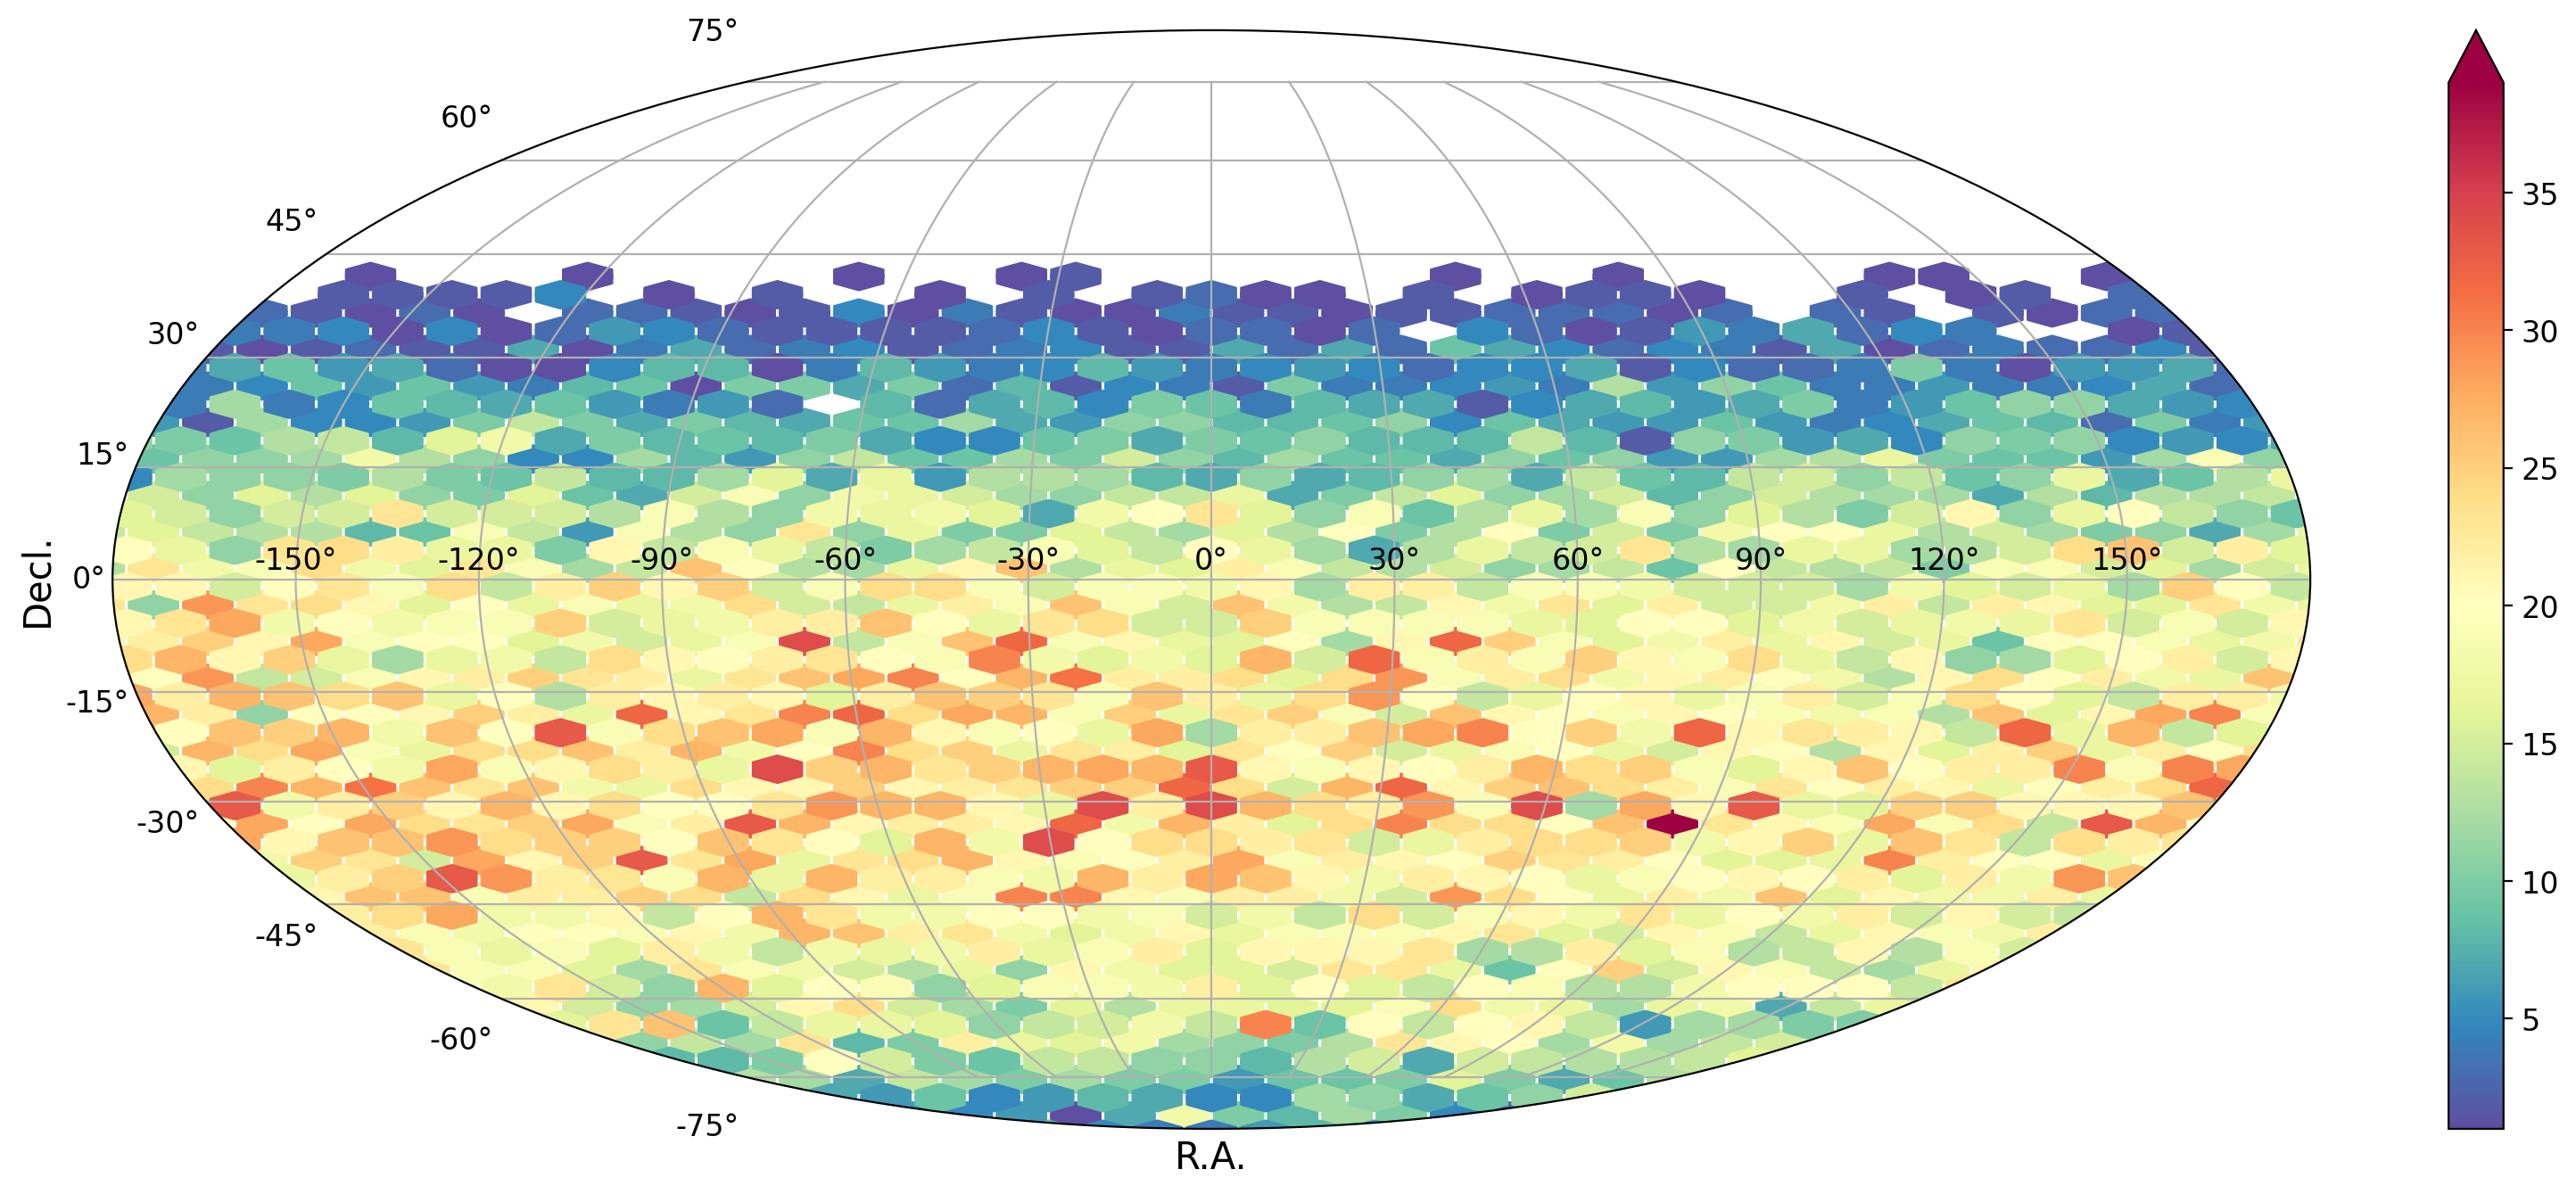

In [11]:
#>>>RUN: L5.5-runcell01

import numpy as np
import csv
import math
import matplotlib.pyplot as plt


#Let's say we have
label='data/events_a8_1space.dat'

def rad(iTheta):
    return iTheta/180. * math.pi

def rad1(iTheta):
    return iTheta/180. * math.pi-math.pi

def exposure(dec):
    theta_max = np.radians(60) # Maximum zenith angle in the dataset
    l = np.radians(-35.23) # Latitude of the center of the array (near Malargüe - Argentina)
    arg = (np.cos(theta_max) - np.sin(l)*np.sin(dec)) / (np.cos(l)*np.cos(dec))
    hm = np.arccos(arg.clip(-1, 1))
    return np.cos(l)*np.cos(dec)*np.sin(hm) + hm*np.sin(l)*np.sin(dec)

def load(label):
    dec=np.array([])
    ra=np.array([])
    az=np.array([])
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile,delimiter=' ')
        for pRow in plots:
            if '#' in pRow[0] or pRow[0]=='':
                continue
            dec = np.append(dec,rad(float(pRow[2])))
            ra  = np.append(ra,rad1(float(pRow[3])))
            az  = np.append(az,rad(float(pRow[4])))
    return dec,ra,az


dec,ra,az = load(label)

color_map = plt.cm.Spectral_r
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(111, projection='mollweide')
image = plt.hexbin(ra, dec, cmap=color_map,gridsize=45, mincnt=1,reduce_C_function=np.sum)

plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.grid(True)
plt.colorbar(image, spacing='uniform', extend='max')
plt.show()


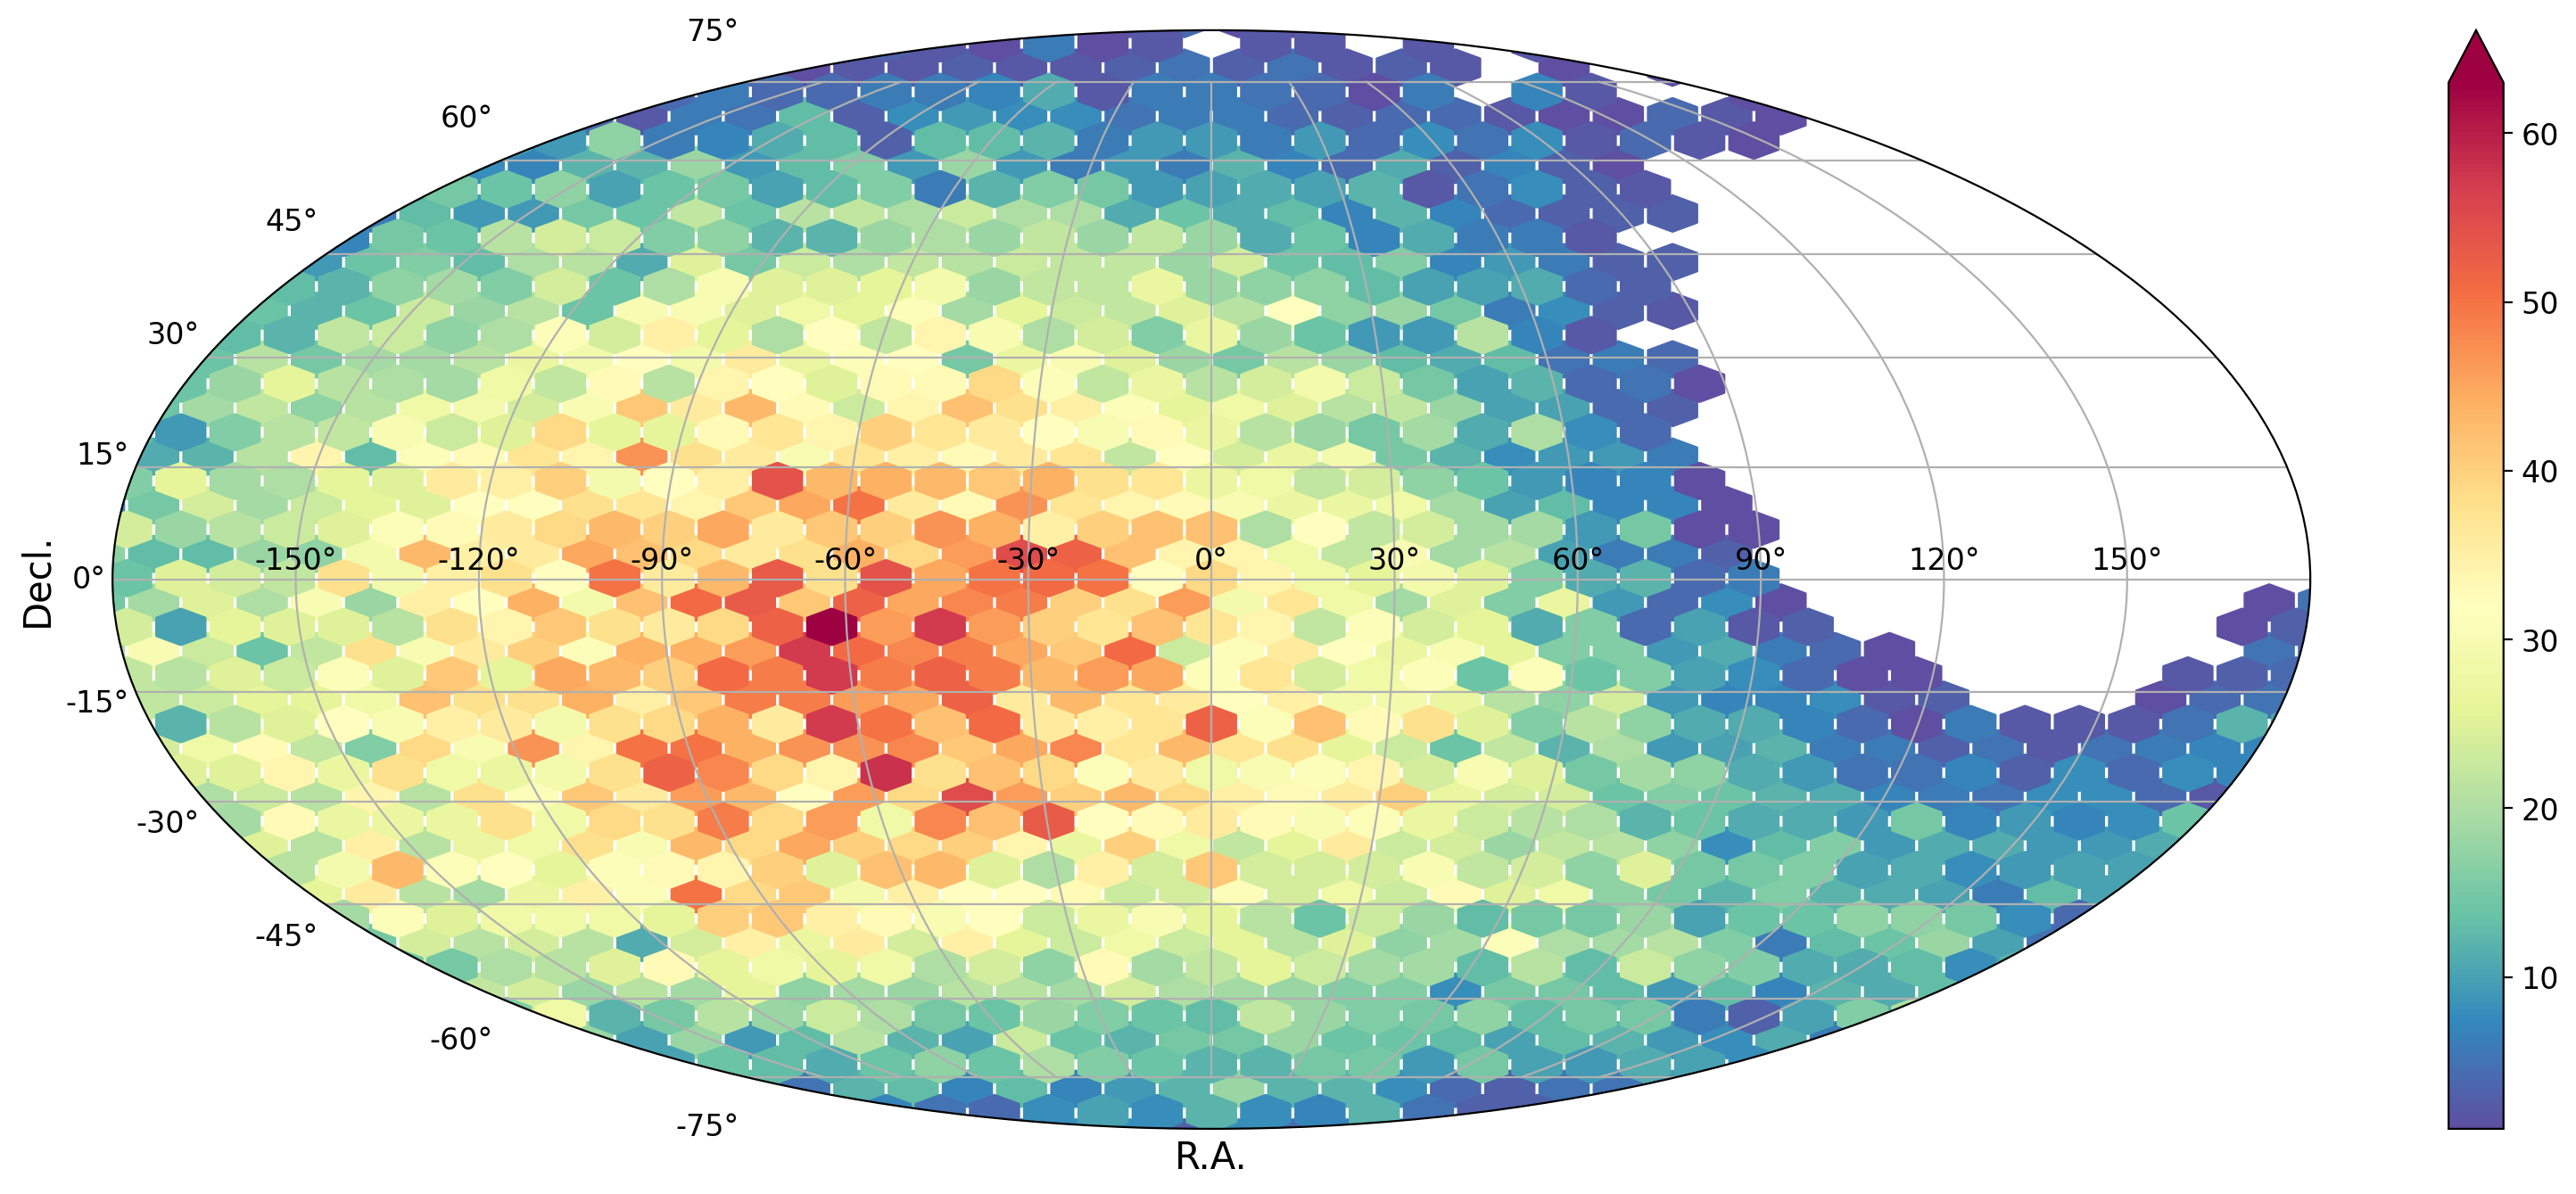

In [12]:
###NOTE: THIS CELL ATTEMPTS TO IMPORT DATA FROM GITHUB, WILL REPLACE CELL ABOVE

#>>>RUN: L5.5-runcell01

#Now let's plot this in Galactic Coordinates
from astropy.coordinates import SkyCoord
from astropy import units
from astropy.coordinates import Galactic

coords = SkyCoord(ra=ra, dec=dec, unit='rad')
rap = coords.galactic.l.wrap_at(180 * units.deg).radian
decp = coords.galactic.b.radian

color_map = plt.cm.Spectral_r
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(111, projection='mollweide')
image = plt.hexbin(rap, decp, cmap=color_map,gridsize=45, mincnt=1,reduce_C_function=np.sum)

plt.xlabel('R.A.')
plt.ylabel('Decl.')
plt.grid(True)
plt.colorbar(image, spacing='uniform', extend='max')
plt.show()


Now, if you look at the above code, you will see one tricky piece, which is a correction for the exposure time. This is a latitude based correction aimed at correcting for the fact that most of the events will be seen at the latitude of the detector (at 34 degrees south), which is what you see when we plot the sky.


One interesting thing that might not be clear however, is the fact that there is a  variation of the intensity as a function of  the RA. Let's highlight this variation by plotting a histogram of intensity with 30 bins along the axis of RA (units of radians in this plot). 

32187


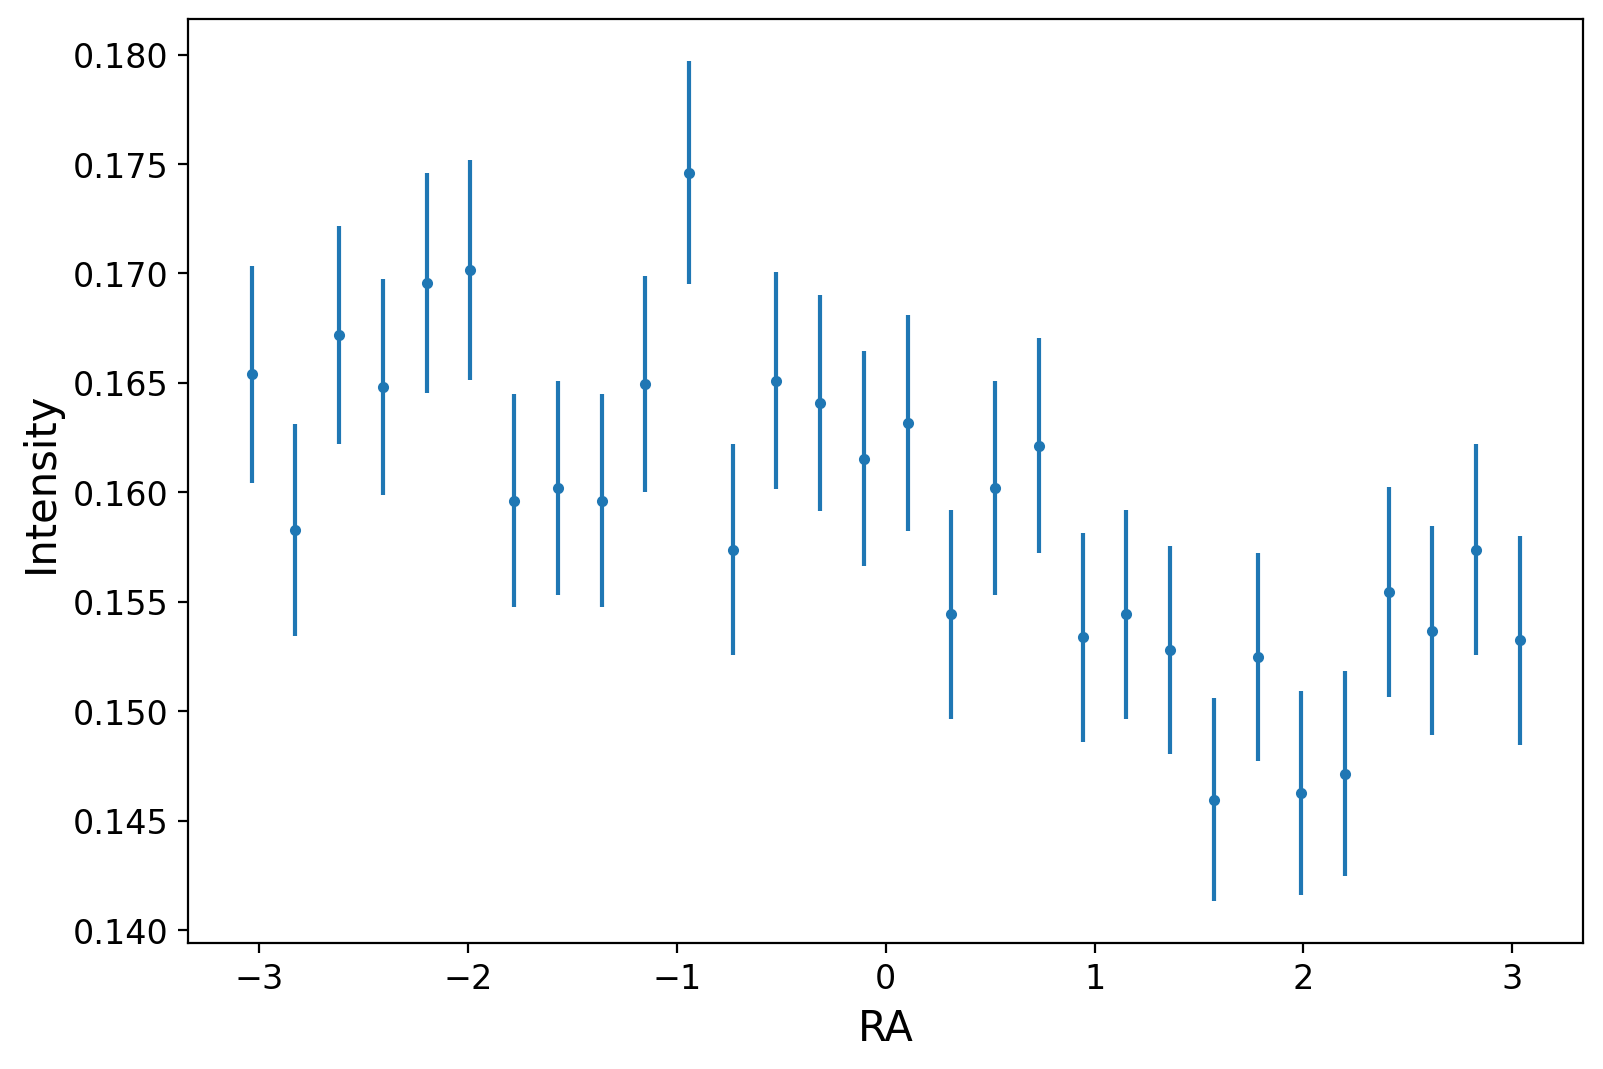

In [13]:
#>>>RUN: L5.5-runcell02

from scipy import stats

def plotHist(iData,iNBins=30,norm=False):
    #Ok enough of having fun, let's look at the asymmetry we observe in right asecion
    y0, bin_edges = np.histogram(iData, bins=iNBins)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
    norm0=len(iData)*(bin_edges[-1]-bin_edges[0])/iNBins
    if not norm:
        norm0 = 1
    plt.errorbar(bin_centers,y0/norm0,yerr=y0**0.5/norm0,marker='.',drawstyle = 'steps-mid',linestyle='none')
    plt.xlabel("RA")
    plt.ylabel("Intensity")
    plt.show()
    return bin_centers,y0

print(len(ra))
_,_ = plotHist(ra,30,True)

<a name='exercises_5_5'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_5) | [Next Section](#section_5_6) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.5.1</span>

What is the range of declination available in the data (the data are given in units of radians).? Report your answer as a list of numbers, in units of radians, with precision 1e-3: `[dec_min, dec_max]`.


In [ ]:
#>>>SOLUTION

print('[dec_min, dec_max] =', [min(dec),max(dec)])

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[-1.5690509975429023, 0.7801621756414654]
</pre>
        
**EXPLANATION:**
        
Use the following code:
    
<pre>
print('[dec_min, dec_max] =', [min(dec),max(dec)])
</pre>
    
We see that the data have a range `[-1.5690, 0.7802]` (radians), or `[-89.897, 44.702]` (degrees).
  
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.5.2</span>

Now let's look at the variations in the intensity as a function of RA for a subset of the data with a certain range of declination. Specifically, select the data with declination above the equator and plot it.

Do you see a trend similar to the one you see in $RA$? Select the best answer from the following:

- Yes, the trend is even more clear
- No, there is conclusively no trend
- There does not appear to be a trend, but the uncertainties are too large to tell


In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

ranew=#YOUR Code here

_,_ = plotHist(ranew)

In [ ]:
#>>>SOLUTION

ranew=ra[dec > 0]
_,_ = plotHist(ranew)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
There does not appear to be a trend, but the uncertainties are too large to tell
</pre>
        
**EXPLANATION:**
        
There doesn't seem to be significant trend, but the uncertainties are 3-4 times larger than when plotting the full dataset. When looking at a subset of the data, you should always be mindful of the uncertainties. 
  
</div>


>#### Follow-up 5.5.2a (ungraded)
>
>Systematically explore different slices of the data within the range `[dec_min, dec_max]`. Are there any trends that you notice?

<a name='section_5_6'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.6 An Example: Auger Data (Part 2)</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_5) | [Exercises](#exercises_5_6) | [Next Section](#section_5_7) |


In [ ]:
#>>>RUN: L5.6-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L05/slides_L05_06.html', width=970, height=550)

<h3>Overview</h3>

Normally, there are some corrections to this distribution to account for non-uniformities in angle of the detector. Note that these non-uniformities are not so large in RA($\phi$) for the simple fact that the Earth rotates. So, we will neglect them for this study. However, in reality you can correct for these by building a simulation. 

Ok, so even without corrections we see that negative RA has more events than positive RA. Let's zoom in on this some more, and count the events. Recall that this is a Poisson process, so the uncertainty on any number $N$ is given by $\sigma_{N}=\sqrt{N}$. 


NLeft: 16600 +/- 128.84098726725125 NRight: 15587 +/- 124.84790747145104 total/2 16093.5


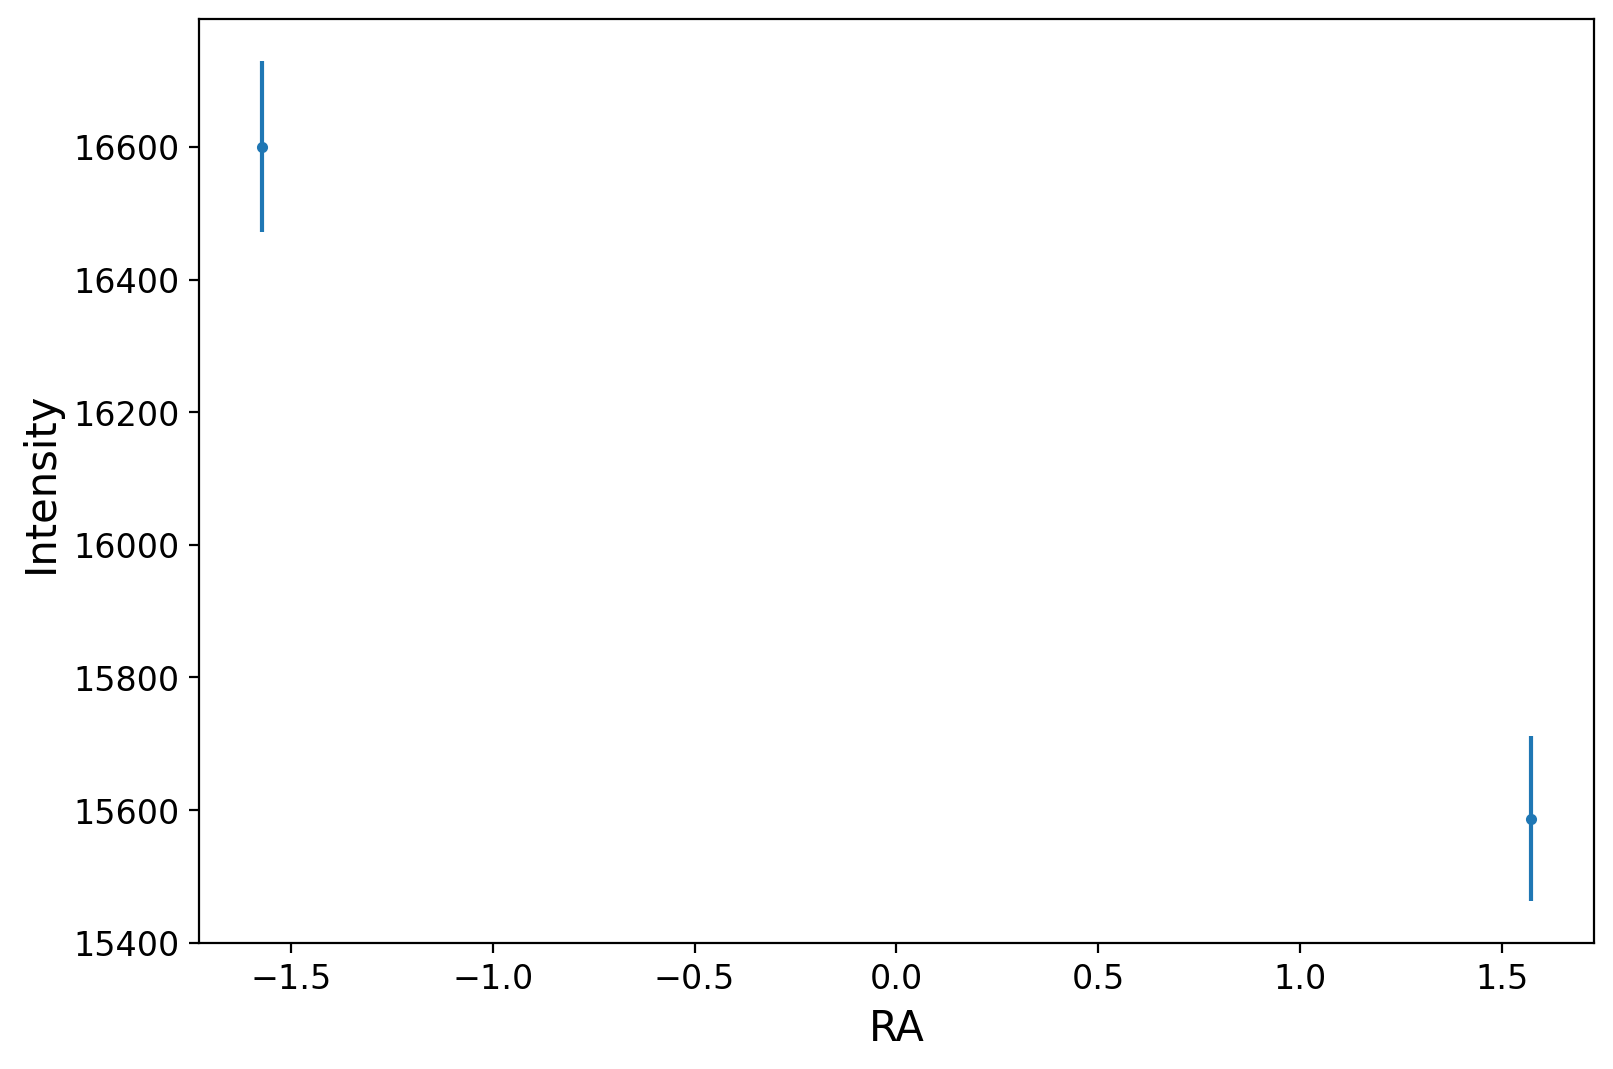

(array([-1.57079633,  1.57079633]), array([16600, 15587]))

In [14]:
#>>>RUN: L5.6-runcell01

#Let's say we have
NLeft=0
NRight=0
for i0 in range(len(ra)):
    if ra[i0] < 0:
        NLeft+=1
    else:
        NRight+=1
print("NLeft:",NLeft,"+/-",math.sqrt(NLeft),"NRight:",NRight,"+/-",math.sqrt(NRight),"total/2",len(ra)/2.)

plotHist(ra,2)

On the left hand side, we see nearly 16600 events over a period of 10 years of operation of Auger. If we take this as a rate, we have that $\lambda=np=16600$, which means that this process behaves as a Poisson process with maximum likelihood at $\lambda=16600$. To see this, let's write out a Poisson distribution. We can imagine we have $N$ processes that have a probability of $1$ event in the time period the data was taken. The likelihood is just the probability of all $N$


$$
\begin{equation}
\mathcal{L} = \frac{\lambda^{N}}{N!} e^{-\lambda}\\
\end{equation}
$$

The log-likelihood of this distribution is just the log of this. 

$$
\begin{equation}
\log(\mathcal{L})=N\log(\lambda)-\lambda-\log(N!) \\
\end{equation}
$$

Optimizing this likelihood distribution, we have

$$
\begin{equation}
\frac{d\mathcal{L}}{d\lambda}=0\\
\frac{N}{\lambda}-1=0\\
\lambda=N
\end{equation}
$$

So, the maximum likelihood for $\lambda$ is just the number of events we observe in the data. Hence we can use that for the aggregate or split distribution to deduce the deviation. Let's compute this by computing the p-value ratio of the most likely occurence of a Poisson process, and the one actually observed. 

In [15]:
#>>>RUN: L5.6-runcell02

def pvalues(NLeft,NRight):
    #Let's compute it
    lamb=(NLeft+NRight)/2. #average number of events
    pleft=stats.poisson.pmf(NLeft,lamb) #probability of left given averge
    pright=stats.poisson.pmf(NRight,lamb) #probability of right given averaged 
    pcheck=stats.poisson.pmf(int(lamb),lamb)#Most likely probability 
    print("Likelihood Ratio-left",pleft/pcheck,"Likelihood Ratio-right",pright/pcheck,"check",pcheck/pcheck)
pvalues(NLeft,NRight)

Likelihood Ratio-left 0.00036943129315803906 Likelihood Ratio-right 0.00032252051151133976 check 1.0


If we predict the rate in right ascension to be uniform, then the number of events that occur at negative (left) RA should be equal to the number of events that occur at positive (right) RA. Let's take the average number of events between left and rights RA to be the expected value of events that occur, if the distribution of events is uniform. Thus, we have that $N_{\mathrm{avg}}=16093.5$.

In this case, the likelihood for $N_{\mathrm{left}}$ is $p=3\times10^{-4}$ less likely that than the average value. Likewise with the right.

In the following questions we will think a bit more about this deviation, and then perform a similar analysis with a different data set.

<a name='exercises_5_6'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_6) | [Next Section](#section_5_7) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.6.1</span>

Consider the analysis that we just performed, where we split the data into left and right RA. How many standard deviations is the count in the left bin, $N_{\mathrm{left}}$, from the expected (or average) count, $N_{\mathrm{avg}}$, assuming a uniform rate? Recall that $N_{\mathrm{avg}}=16093.5$ and $N_{\mathrm{left}} = 16600 \pm 128.84$.

Calculate the same number for the right bin, and report your answer as a list of two positive numbers `[num_stdev_left, num_stdev_right]`, with precision 1e-2.

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

pass


In [ ]:
#>>>SOLUTION

Navg=len(ra)/2.
num_stdev_left = abs(NLeft-Navg)/np.sqrt(NLeft)
num_stdev_right = abs(NRight-Navg)/np.sqrt(NRight)

print('[num_stdev_left, num_stdev_right]=',[num_stdev_left, num_stdev_right])


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[3.931202412702576, 4.056936237524216]
</pre>
        
**EXPLANATION:**
    
See solution code:

<pre>
Navg=len(ra)/2.
num_stdev_left = abs(NLeft-Navg)/np.sqrt(NLeft)
num_stdev_right = abs(NRight-Navg)/np.sqrt(NRight)

print('[num_stdev_left, num_stdev_right]=',[num_stdev_left, num_stdev_right])
</pre>
    
</div>


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.6.2</span>

So far, we've been working with the high energy data. Now load the data at lower energy (4-8 EeV cosmic rays) `events_a4_1space.dat`. As we did previously, plot the RA variation using 30 bins, then make a plot using two bins (splitting the data into left and right sides).

Compute the likelihood ratio for the left data bin and the right data bin, as we did previously. Complete the code below to help do this, or write your own.

What is the probability that we observe the number of counts in each data bin (left and right), assuming that the rate of counts is uniform in RA? Report your answer as a list of two positive numbers `[likelihood_ratio_left, likelihood_ratio_left]`, with precision 1e-3. 


NLeft: 40843 +/- 202.0965115978007 NRight: 40858 +/- 202.13361917306088 total/2 40850.5


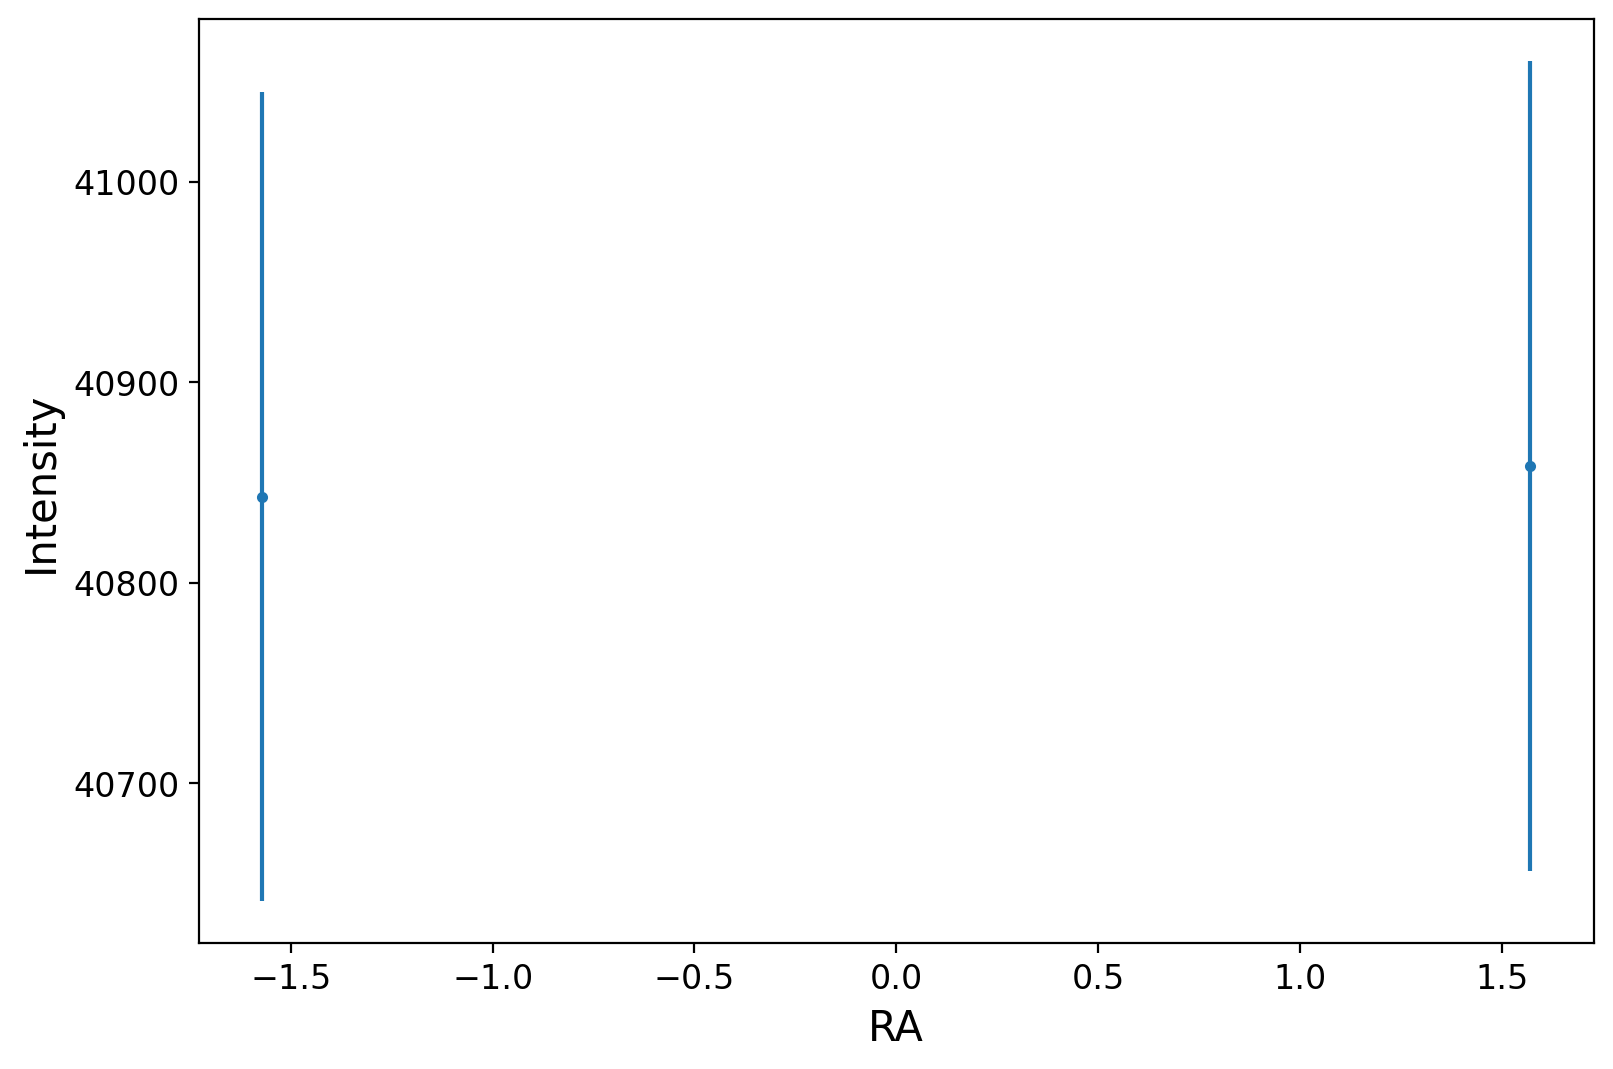

Likelihood Ratio-left 0.9994003979088298 Likelihood Ratio-right 0.9992170135352566 check 1.0


In [16]:
#>>>PROBLEM

label_2='data/events_a4_1space.dat'
dec_2,ra_2,az_2=load(label_2)

#compute asymmetry
NLeft_2=0
NRight_2=0
for i0 in range(len(ra_2)):
    if ra_2[i0] < 0:
        NLeft_2+=1
    else:
        NRight_2+=1
print("NLeft:",NLeft_2,"+/-",math.sqrt(NLeft_2),"NRight:",NRight_2,"+/-",math.sqrt(NRight_2),"total/2",len(ra_2)/2.)

plotHist(ra_2,2)


#PRINT THE COUNTS WITH UNCERTAINTY

#PRINT THE PROBABILITY (LIKELIHOOD RATIO)
pvalues(NLeft_2,NRight_2)

#PLOT IT

In [ ]:
#>>>SOLUTION

label_2='data/events_a4_1space.dat'
dec_2,ra_2,az_2=load(label_2)

#compute asymmetry
NLeft_2=0
NRight_2=0
for i0 in range(len(ra_2)):
    if ra_2[i0] < 0:
        NLeft_2+=1
    else:
        NRight_2+=1

print("NLeft:",NLeft_2,"+/-",math.sqrt(NLeft_2),"NRight:",NRight_2,"+/-",math.sqrt(NRight_2),"total/2",len(ra_2)/2.)
pvalues(NLeft_2,NRight_2)

#plot it
plotHist(ra_2)
plotHist(ra_2,2)

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
[0.9994003979088298, 0.9992170135352566]
</pre>
        
**EXPLANATION:**
    
Follow the analysis that was done in the lesson. The likelihood ratios are both very close to 1.
    
</div>


<a name='section_5_7'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.7 Log-Likelihood and Chi-square</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_6) | [Exercises](#exercises_5_7) | [Next Section](#section_5_8) |


<h3>Slides</h3>

Run the code below to view the slides for this section, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L05/slides_L05_07.html" target="_blank">HERE</a>.

In [ ]:
#>>>RUN: L5.7-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L05/slides_L05_07.html', width=970, height=550)

<h3>Slides</h3>

View the slides for this section below, which are discussed in the related video. You can also open the slides in a separate window <a href="https://mitx-8s50.github.io/slides/L05/slides_L05_07.html" target="_blank">HERE</a>.

<p align="center">
<iframe src="https://mitx-8s50.github.io/slides/L05/slides_L05_07.html" width="900", height="550" frameBorder="0"/>
</p>

<h3>Interpreting Likelihood</h3>

In the above, we compared the likelihood of two distributions from a flat hypothesis. We did this by considering the likelihood of a deviation from flat. We see that lower energy particles are pretty close to flat, whereas higher energy particles start to deviate from flat. As a physicist, this is when you start to think WTF. Let's talk about the physics implications later, but for now let's understand the statistics a little more. Let's ask a profound question. How can we improve the sensitivity of this measurement? 

**Use more than just the left and right sides of the distribution.**

To extend the sensitivity, what we can do next is to define a likelihood for an arbitrary distribution. We can define the likelihood over a number of points by imagining that instead of just left and right, each bin is a specific measurement that we perform $N^{events}_{bin}$ times. From this, we can consider the probability of each bin given an expected mean prediction for that bin. For $N$ bins where for bin $i$ we have $x_{i}$ number of events and having the same mean prediction, we can write the likelihood as the multiplication of $N$ Poisson experiments each with the same predicted number of events. 


$$
\begin{eqnarray}
\mathcal{L}(x|\lambda)&=&\prod_{i=1}^{N} p(x_{i}|\lambda) \\
\mathcal{L}(x|\lambda)&=&\prod_{i=1}^{N} \frac{\lambda^{x_{i}}}{x_{i}!}e^{-\lambda} \\
\log(\mathcal{L}(x|\lambda))&=&\sum_{i-1}^{N}  x_{i}\log(\lambda)-\log(x_{i}!)-\lambda
\end{eqnarray}
$$

If we want to optimize this for a specific $\lambda$, then we just take the derivative

$$
\begin{eqnarray}
\frac{d}{d\lambda}\log(\mathcal{L}(x|\lambda))&=&0=\sum_{i-1}^{N}  \frac{x_{i}}{\lambda}-1 \\
 N\lambda&=&\sum_{i-1}^{N} x_{i} \\
 \lambda=\bar{x}
\end{eqnarray}
$$

Surprise, surprise! The optimal value $\lambda$ is just the average over all the bins.

Moreover, we can compute the variance of $\lambda$ from its definition. In this case we get 

$$
\begin{equation}
\sigma_{\lambda}^2=\mathrm{Var}\left(\frac{1}{N}\sum_{i=1}^{N} x_{i}\right)\\
\sigma_{\lambda}^2=\frac{1}{N^2}\sum^{N}_{i=1}\mathrm{Var}(x_{i}) \\
\sigma_{\lambda}^2=\frac{1}{N^2}N\bar{x}=\frac{\bar{x}}{N}
\end{equation}
$$

Let's compute the likelihood of the above distributions using all of the bins.

In [17]:
#>>>RUN: L5.7-runcell00

#For the purposes of this section, we will use the low energy data.
#Load it here, where we will redefine dec, ra, and az

label_2='data/events_a4_1space.dat'
dec,ra,az=load(label_2)

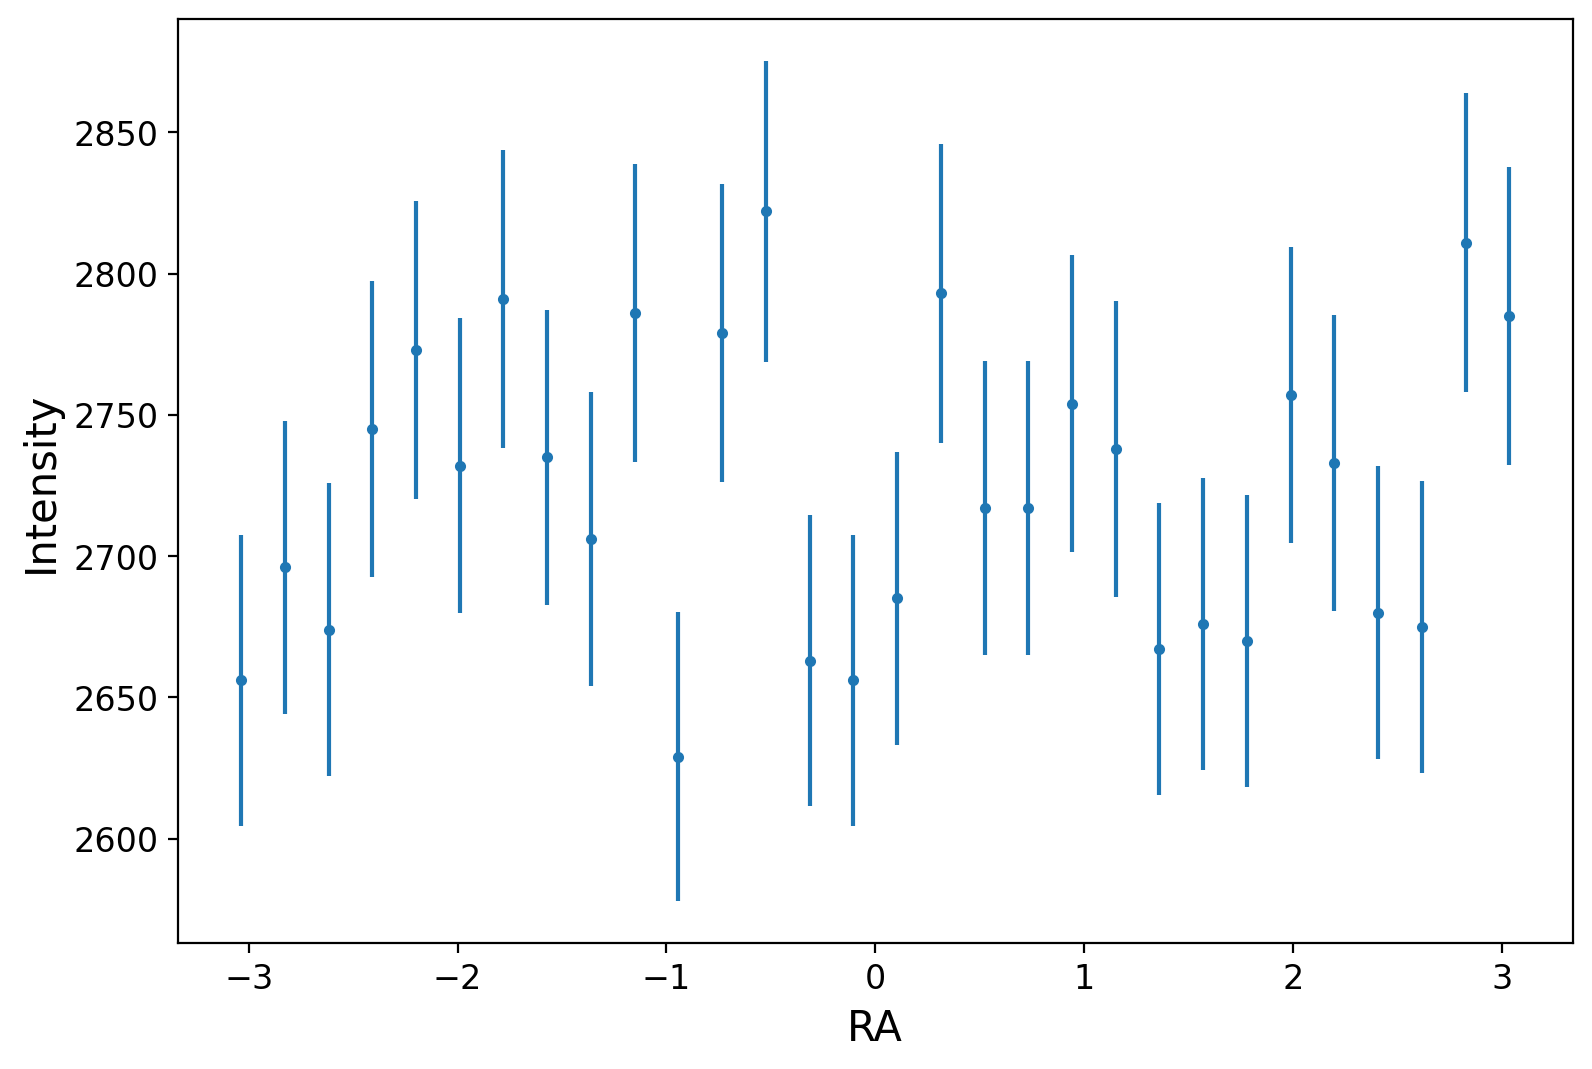

Log Likelihood 161.3120590533399 Regular Likelihood 1.1400846838845268e+70


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_35838/323198834.py:10: RuntimeWarning: divide by zero encountered in log
  lTot = xi*np.log(lamb) - lamb  - math.log(test) + lTot
/Users/philipharris/miniconda3/lib/python3.10/site-packages/scipy/optimize/_optimize.py:2884: RuntimeWarning: invalid value encountered in scalar divide
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom


minimum found:  message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: 161.31205905330353
       x: 2723.3667391968315
     nit: 16
    nfev: 42 Mean: 2723.366666666667


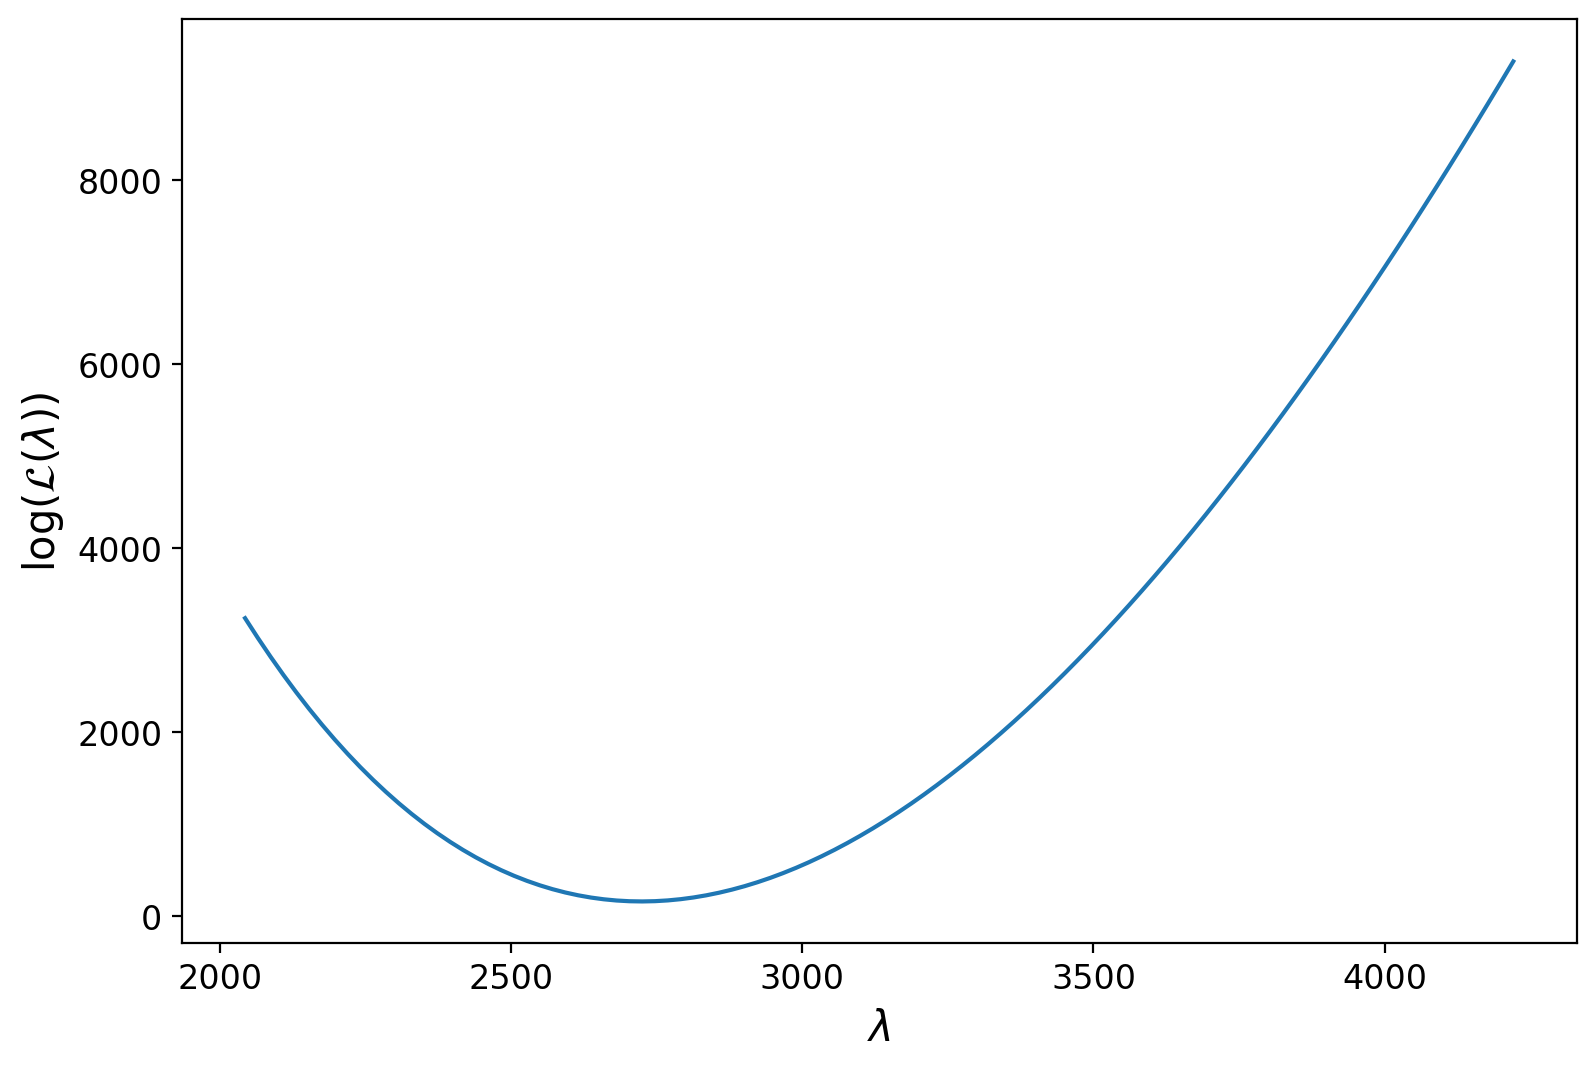

In [18]:
#>>>RUN: L5.7-runcell01

_,xis=plotHist(ra)

#Now let's define the log of a Poisson distribution (see above)
def logpoisson(lamb): #x is our lambda and y0 is our data
    lTot=0
    for xi in xis:
        test = math.factorial(xi)
        lTot = xi*np.log(lamb) - lamb  - math.log(test) + lTot
    return -1.*lTot

#Now lets take the mean of this distribution and compute labmda
lamb=xis.mean()
print("Log Likelihood",logpoisson(lamb),"Regular Likelihood",np.exp(logpoisson(lamb)))
x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.xlabel("$\lambda$")
plt.ylabel("$\log(\mathcal{L}(\lambda))$")
plt.plot(x, logpoisson(x));

#finally let's compute the minimum of this distribution
from scipy import optimize as opt
sol=opt.minimize_scalar(logpoisson, method='Brent')
print("minimum found:",sol,"Mean:",lamb.mean())

By minimizing the likelihood we are finding the optimum position of our parameters. Note that the likelihood is some giant number, but the log likelihood is not large (this is because we are multiplying a lot of small probability numbers). This situation isn't so unusual, so perhaps you can see why we prefer working with log likelihood!

Now, let's go back to our test. We would like to test this variation in the data and see how consistent each bin is with a Poisson distribution. For this to be the case, our absolute likelihood value has to be a reasonable number. So what is a reasonable number?

Here is where we have to rely on some clever trickery. What we are going to do is invoke the central limit theorem, and state that since we are dealing with large numbers, the distribution of our sample about its expectation is going to be Gaussian with standard deviation given for a Poisson distribution. Then, we can compute the log likelihood. Let's do it for each of our bins. 
 


$$
\begin{eqnarray}
\mathcal{L}(x|\lambda)&=&\prod_{i=1}^{N} p(x_{i}|\lambda) \\
\mathcal{L}(x|\lambda)&=&\prod_{i=1}^{N} \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x_{i}-\mu)^2}{2\sigma^2}} \\
-\log(\mathcal{L}(x|\lambda))&=&\sum_{i-1}^{N}  -\frac{1}{2}\log(2\pi\sigma^2)+\frac{(x_{i}-\mu)^2}{2\sigma^2}\\
\end{eqnarray}
$$

The above is for $N$ Gaussian distributed bins. For $N$ Poisson distributed bins we can approximate it as a Gaussian with mean $\lambda$ and $\sigma=\lambda$, and so we can write


$$
\begin{eqnarray}
\mathcal{L}(x|\lambda)&=&\Pi_{i=1}^{N} \frac{1}{\sqrt{2\pi\lambda}}e^{\frac{-(x_{i}-\lambda)^2}{2\lambda}} \\
-\log(\mathcal{L}(x|\lambda))&=&\sum_{i-1}^{N}  -\frac{1}{2}\log(2\pi\lambda)+\frac{(x_{i}-\lambda)^2}{2\lambda}\\
\end{eqnarray}
$$

Recall from above using the Poisson form we had

$$
\begin{eqnarray}
\log(\mathcal{L}(x|\lambda))&=&\sum_{i-1}^{N}  x_{i}\log(\lambda)-\log(x_{i}!)-\lambda
\end{eqnarray}
$$

If we equate the two we see they are a bit different, and as a consequence our likelihood value will be different. Furthermore there is something else surprising and interesting about this. Let's look at just one term $N=1$ (not just for Poisson).


$$
\begin{eqnarray}
f(x|\lambda) &=&-\frac{1}{2}\log(2\pi\sigma^2)+\frac{(x_{i}-\mu)^2}{2\sigma^2}\\
E[f(x)]      &=&-\frac{1}{2}\log(2\pi\sigma^2)+E[g^{\prime}(x)]\\
\mathrm{where~}g^{\prime}(x)         &=&\frac{(x_{i}-\mu)^2}{2\sigma^2}\\
E[g^{\prime}(x)]      &=&\frac{\mathrm{Var}(x)}{2\sigma^2}\\
E[g^{\prime}(x)]      &=&\frac{\sigma^2}{2\sigma^2}=1/2\\
\end{eqnarray}
$$


We have focused in on this one parameter $g^{\prime}(x)$ since the other parameter is just a constant calculated from the parameters of the Gaussian distribution. Since we have assumed $x_{i}$ are each Gaussian distributed with mean $\mu$, we get the expectation for this distribution is zero and the variance is $\sigma$, yielding 1/2 when considering $g(x)$ over the data. As a consequence we have that $\log$ of the likelihood using a gaussian will be $\frac{1}{2}-\frac{1}{2}\log(2\pi\sigma^2)$. 


Since the 1st term doesn't affect the optimization it is often dropped. We can also multiply by 2 to make things look nice, again with no effect. 

$$
\begin{eqnarray}
g(x) &=& \frac{(x_{i}-\mu)^2}{\sigma^2}\\
\end{eqnarray}
$$

For variables which are truly Gaussian distributed, we expect this to be 1. Furthermore, if we sum over many of these variables we get: 


$$
\begin{eqnarray}
g(x) &=& \sum_{i=1}^{N} \frac{(x_{i}-\mu)^2}{\sigma^2}\\
E[g(x)] & = & N
\end{eqnarray}
$$

We then expect that for $N$ Gaussian distributed variables this will give us a value of $N$. This expectation allows us to actually test the data. If we run over our data and compute $E[g(x)]$ and it's too small ($\ll N$), then our value for $\sigma$ is too large. If our value for $E[g(x)]$ is too large ($\gg N$) then we don't have a good fit to the data and our value for $\sigma$ is too small. 

Furthermore, the sum of $N$ independent Gaussian random numbers with variance 1 in itself makes its own distribution. This is a $\chi^{2}$ distribution with $N$ degrees of freedom, and $g(x)$ above is referred to as $\chi^{2}$. 

For a Poisson distribution, we can further simplify this to the classic $\chi^{2}$ that we physicists know and love and copiously use. 
 
 
$$
\begin{eqnarray}
\chi^{2}(x) &=& \sum_{i=1}^{N} \frac{(x_{i}-\lambda)^2}{\lambda}\\
\end{eqnarray}
$$

We are going to talk a lot more about $\chi^{2}$ distributions. However, an important thing to note is that 

$$
\begin{eqnarray}
E[\chi^{2}(x)] &\approx& N \\
E[\chi^{2}(x)/N] &\approx& 1 
\end{eqnarray}
$$

This last relation is known as the normalized $\chi^{2}$, which we expect to approach $1$ in the large $N$ limit. This is often why fits report the normalized $\chi^{2}$. 

Let's now go back to our minimization problem. In the above code, we minimized the Poisson likelihood. Let's now minimize the Gaussian likelihood, and the $\chi^{2}$ likelihood, and see what we get. 

<a name='exercises_5_7'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_7) | [Next Section](#section_5_8) |


<a name='section_5_8'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.8 Minimizing</h2>  

| [Top](#section_5_0) | [Previous Section](#section_5_7) | [Exercises](#exercises_5_8) | [Next Section](#section_5_9) |


In [ ]:
#>>>RUN: L5.8-slides

from IPython.display import IFrame
IFrame(src='https://mitx-8s50.github.io/slides/L05/slides_L05_08.html', width=970, height=550)

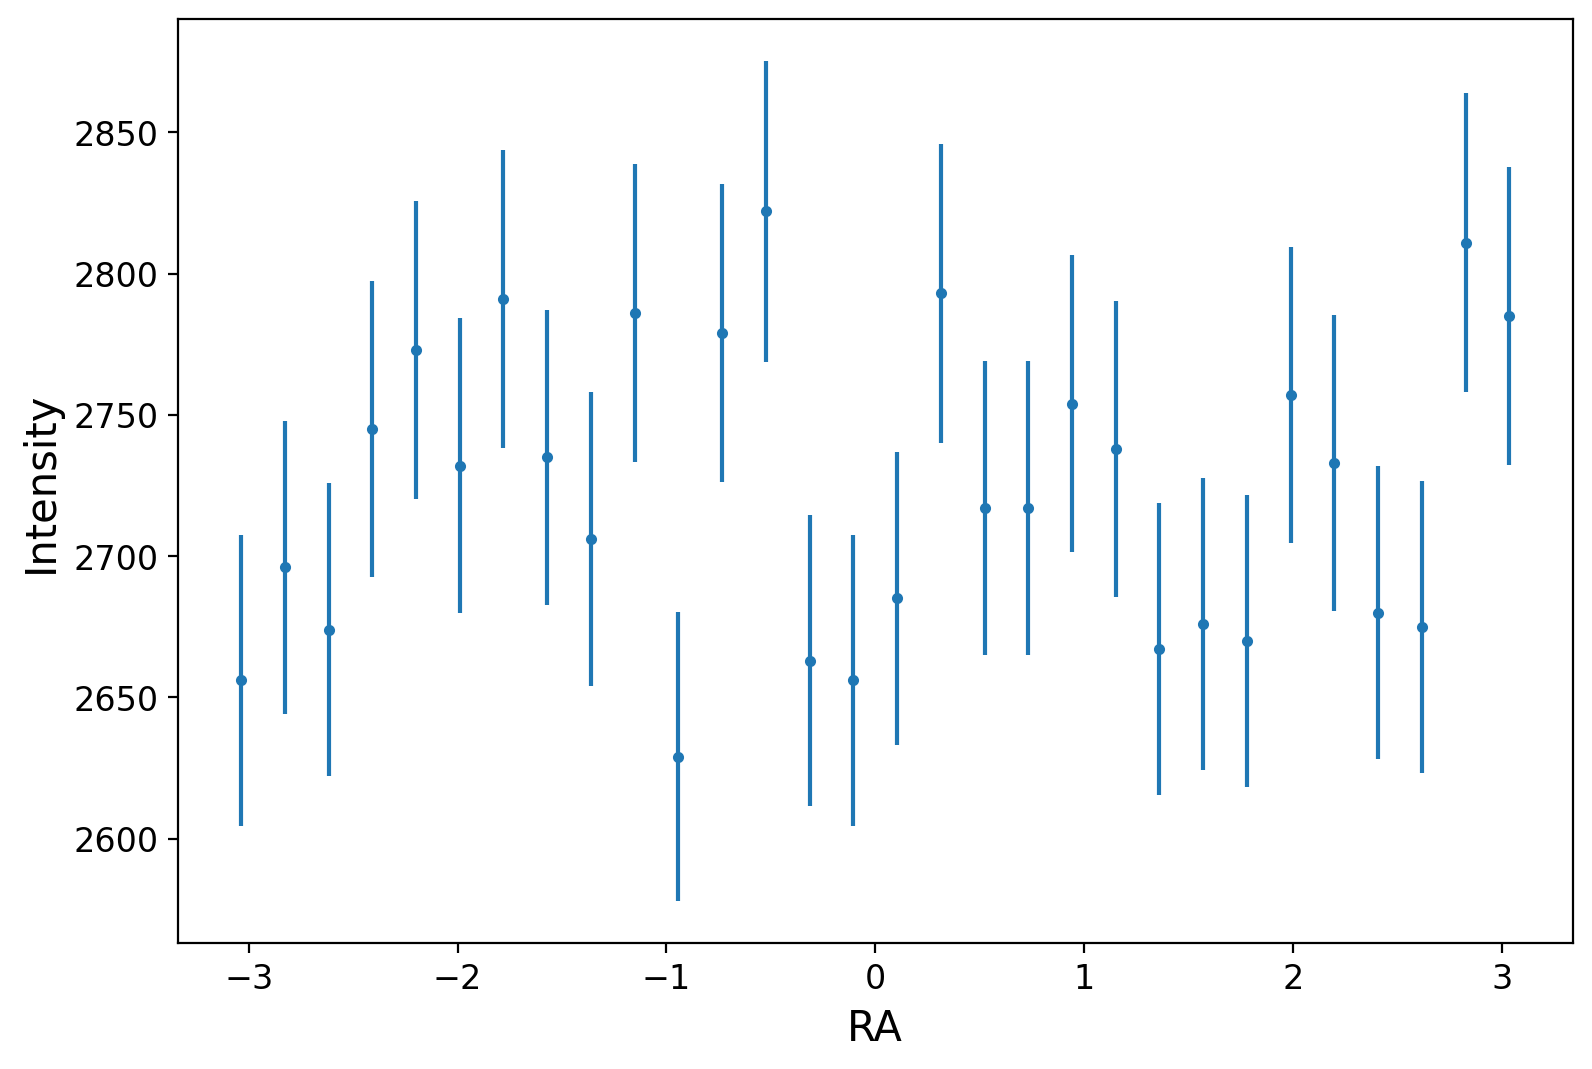

[2656 2696 2674 2745 2773 2732 2791 2735 2706 2786 2629 2779 2822 2663
 2656 2685 2793 2717 2717 2754 2738 2667 2676 2670 2757 2733 2680 2675
 2811 2785]


In [29]:
_,xis=plotHist(ra)
print(xis)

Poisson Likelihood at minimum 161.3120590533399 2723.366666666667 30
Gaussian Likelihood at minimum -131.09869456062285 2723.366666666667 30
chi2 value at minium 30.227647152420516


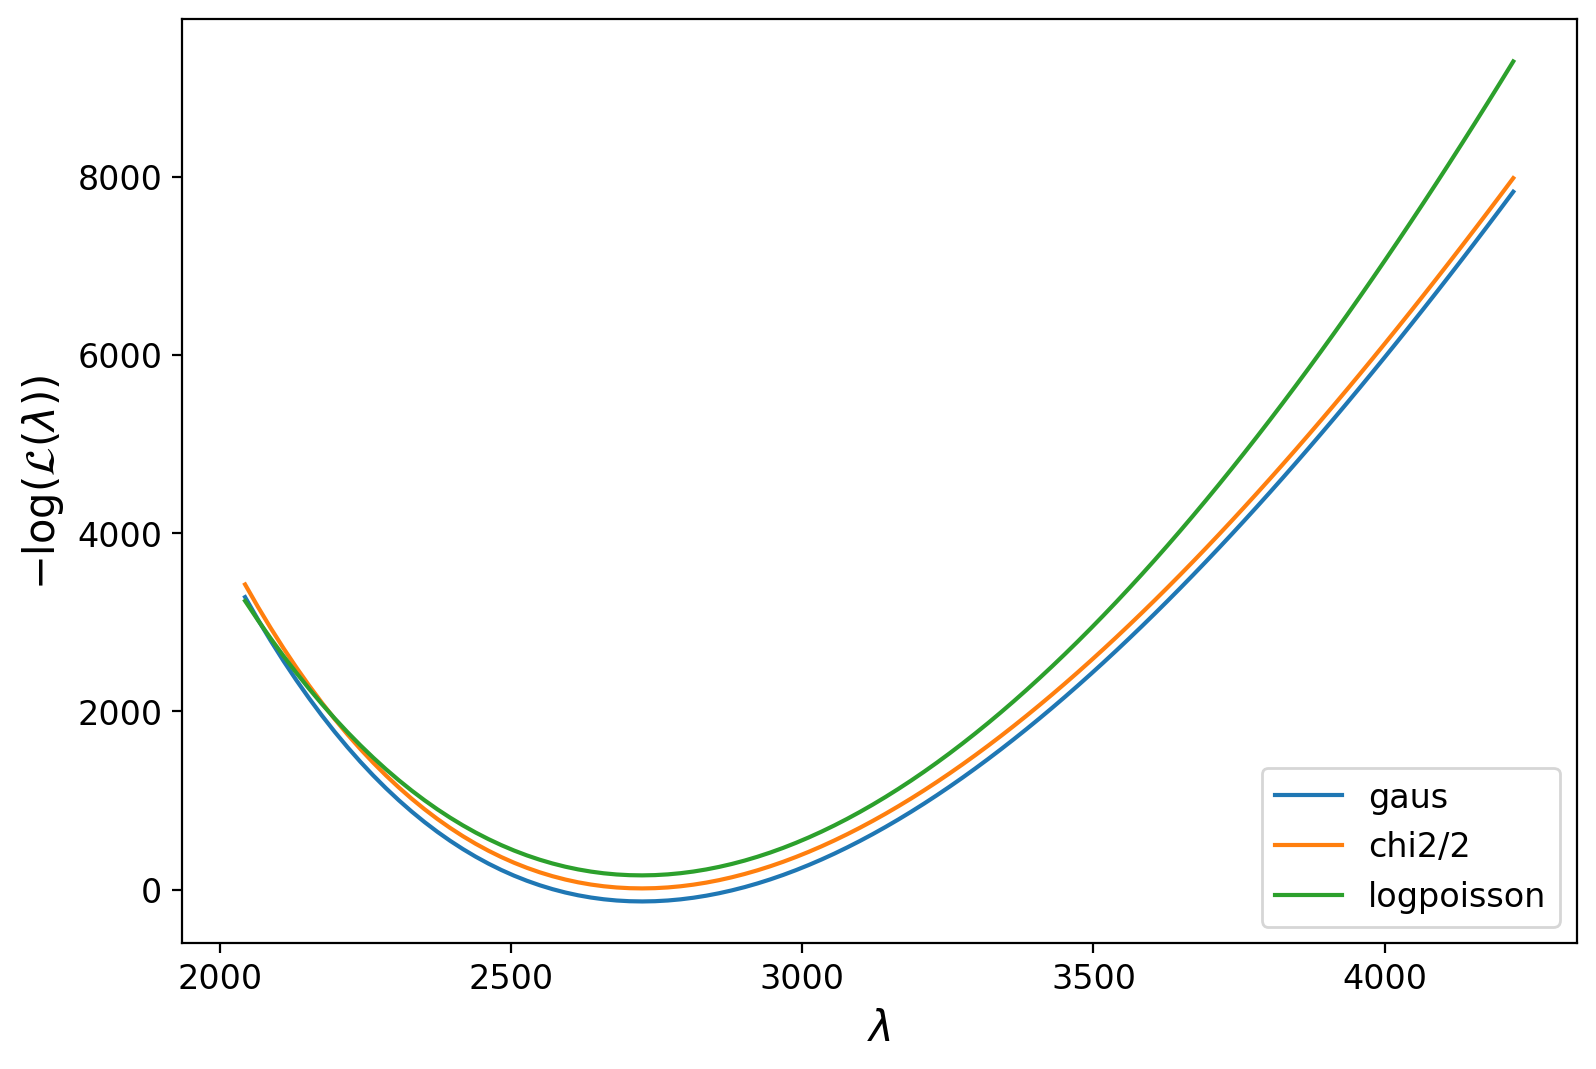

/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_35838/323198834.py:10: RuntimeWarning: divide by zero encountered in log
  lTot = xi*np.log(lamb) - lamb  - math.log(test) + lTot


Poisson Minimum 2723.3667391968315
Gaussian Minimum 2724.3704605147764
Chi2 Minimum 2723.870413833724


/var/folders/4t/mwl83f3x1ls0jvy35v4qzj7c0000gp/T/ipykernel_35838/4154826085.py:8: RuntimeWarning: divide by zero encountered in log
  lTot = lTot-0.5*np.log(math.pi*2*lamb)


In [30]:
#>>>RUN: L5.8-runcell01

#Log likelihood of a gaussian distribution of our data from above
def loggaus(lamb):
    lTot=0
    for xi in xis:
        lTot = lTot+(0.5/(lamb+1e-5))*(xi-lamb)**2
        lTot = lTot-0.5*np.log(math.pi*2*lamb)
    return lTot

#chi2 distribution of our data from above.  
def chi2(lamb):
    lTot=0
    for xi in xis:
        lTot = lTot+(1./(lamb+1e-10))*(xi-lamb)**2
    return lTot


lamb=xis.mean()
print("Poisson Likelihood at minimum",logpoisson(lamb),lamb,len(xis))
print("Gaussian Likelihood at minimum",loggaus(lamb),lamb,len(xis))
print("chi2 value at minium",chi2(lamb))

x = np.linspace(lamb*0.75, lamb*1.55, 100)
plt.plot(x, loggaus(x),label='gaus');
plt.plot(x, chi2(x)/2.,label='chi2/2');
plt.plot(x, logpoisson(x),label='logpoisson');
plt.xlabel("$\lambda$")
plt.ylabel("$-\log(\mathcal{L}(\lambda))$")
plt.legend(loc='lower right')
plt.show()

#Now let's minimize the two
from scipy import optimize as opt
sol0=opt.minimize_scalar(logpoisson, method='Brent')
print("Poisson Minimum",sol0.x)
sol1=opt.minimize_scalar(loggaus, method='Brent')
print("Gaussian Minimum",sol1.x)
sol2=opt.minimize_scalar(chi2, method='Brent')
print("Chi2 Minimum",sol2.x)





From the above, we see that we can get to the same minimum with either the full Gaussian or the $\chi^{2}$ distribution. Now, understanding whether your fit is good or not can be completely interpreted by understanding the $\chi^{2}$ distribution. The $\chi^{2}$ is a very powerful distribution that we can compute numerically. We can use python tools to understand it, so let's do just that. 

In [ ]:
#>>>RUN: L5.8-runcell02

#Now let's look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,30) # w0 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2(lamb), c='red')
plt.legend(loc='lower right')
plt.xlabel("$\chi^{2}(x)$")
plt.ylabel("p-value")
plt.show()

For our fit above, we see that the value we get for our $\chi^{2}$ calculation is 30, and we see that for a $\chi^{2}$ distribution that is the sum of 40 independent bins, a value of 30 has a relatively large p-value in the sense that it is close to the peak and we can see it on the blue line. We will talk more about how to interpret these values, but let's move forward with this. However, for now, we can  conclude that a flat line, Poisson-like hypothesis for this data is a good description. 

Now, before we go to look at a bad fit, I want to go back to the variance of the distribution. Above, we found $\sigma_{\lambda}^{2}=\frac{\bar{x}}{N}$. What if we can obtain this directly from our minimization?

With a little bit of math (that we will skip here) we can compute:


$$
\begin{equation}
\mathrm{Var}(\chi^{2}(x))=2N
\end{equation}
$$

which means that for $\Delta \chi^{2}(x)=|\chi^{2}(x)-\chi^{2}(x\pm\sqrt{2N})|$, we are within a standard deviation of the minimum. Imagine living on the line of this distribution and considering moving away from the minimum. Well, if we move away from the minimum, our chances of having a distribution that has a $\chi^{2}$ value that is not exactly at the minimum is still quite likely provided we are in this $2N$ range. 

**Presuming that $\lambda$ is itself Gaussian, we have that $\lambda$ also follows a $\chi^{2}$ distribution of the model. We will write this in terms of an expansion of a parameter $\mu$ about the best fit $\lambda$, which we denote $\mu_{0}$.** A $\chi^{2}$ distribution is a sum of Gaussians, so 1 Gaussian is still a $\chi^{2}$ distribution. 

Consequently, $\Delta \chi^{2}$ varying our one parameter($\lambda$) corresponds to varying a $\chi^{2}$ distribution of 1-degree of freedom. This means that we can write


$$
\begin{equation}
\rm{Var}(\chi^{2}_{1}) = 2 \\
\chi^{2}_{1}(X)  = \left(\frac{\mu-\mu_{0}}{\sigma}\right)^{2}\\
\rm{a~deviation~of~+1~in~}\chi~\rm{corresponds~to}\\
\rm{\Delta \chi_{1}^2} = 2 \Delta \log \mathcal{L} = 1
\end{equation}
$$

for 1 varying parameter (1 degree of freedom). What this means is that the variance on our measured value of $\lambda$ can be found by varying just the parameter $\lambda$ looking at the $\chi^{2}$ value and requiring that $\Delta \chi^{2}$ from the minimum be $1$. The positions below and above $\mu_0$ where $\chi^2$ is 1 above the minimum correspond exactly to the $+1$ and $-1$ standard deviation of the value $\mu$. 

Let's dig a little deeper, to see this through a Taylor expansion of $\chi^{2}$


$$
\begin{equation}
\chi^{2}(x_{i},\mu)=\chi^{2}_{min}(x_{i},\mu_{0})+\frac{1}{2}\frac{\partial^{2}}{\partial \mu^{2}}\chi^{2}_{min}(x_{i},\mu_{0})(\mu-\mu_{0})^{2}
\end{equation}
$$

where $\hat{\lambda}$ is the best fit of $\lambda$ at the minimum. 

Now, imagine we deviate up from the minimum of the $\chi^{2}$ by values $\sigma_{\mu}$, we know that these deviations need to correspond to $\frac{1}{2}$.  Since we can write out the full form with Poisson uncertainty, let's solve

$$
\begin{eqnarray}
\mathrm{\Delta \chi^2}& = & 1 = \sum_{i=1}^N\frac{(\mu-\mu_{0} + \sigma)^{2}}{\sigma}-\sum_{i=1}^N\frac{(\mu-\mu_{0})^{2}}{\sigma}\\
1 & \approx & \sum_{i=1}^N\frac{(\mu-\mu_{0}+\sigma)^{2}}{\sigma}-\sum_{i=1}^N\frac{(\mu-\mu_{0})^{2}}{\sigma}\\
1 & = & \frac{1}{\sigma}\sum_{i=1}^N (\mu-\mu_{0}+\sigma)^{2}-(\mu-\mu_{0})^{2}\\
1 & = & \frac{1}{\sigma}\sum_{i=1}^N \sigma^{2}+2\sigma(\mu-\mu_{0}) \\
1 & = & \frac{N\sigma^{2}}{\sigma} \\
\sigma^{2} & = & \frac{\mu_{0}}{N}   \\
\end{eqnarray}
$$

just as in derivation of $\sigma_{\lambda}^{2}$ above. This gives us a strong confirmation of the Taylor expansion approach that we can verify empirically as well. Through this approach, we also immediately get the correspondence in the variation of the $\chi^{2}$ that $\frac{\partial^{2} \chi^{2}}{\partial \theta^{2}}=\frac{2}{\sigma^2_{\theta}}$. This is known as Wilk's theorem (https://www.jstor.org/stable/2957648?seq=1), and is related closely to a more general form known as Wald's test. Its more generally written in terms of the likelihood as 


$$
\begin{equation}
\sigma^{2}_{\theta} = \left(\frac{\partial^{2}\log \mathcal{L}}{\partial\theta^{2}}\right)^{-1}
\end{equation}
$$

For multiple parameters, we write this as a vector $\vec{\theta_{i}}$, we can expand this in terms of the Hessian$\frac{\partial^{2}\chi^{2}}{\partial\theta_{i}\partial\theta_{j}}$, the Taylor expansion is as follows

$$
\begin{equation}
\chi^{2}(x_{i},\vec{\theta})=\chi^{2}_{min}(x_{i},\vec{\theta})+\frac{1}{2}(\theta_{i}-\theta_{j})^{T}\frac{\partial^{2}}{\partial \theta_{i}\theta_{0}}\chi^{2}_{min}(x_{i},\vec{\theta}_{0})(\theta_{j}-\theta_{0})
\end{equation}
$$

Let's go back to our $\chi^{2}$ minimum function and compute the +1$\sigma$ variation and the -1$\sigma$ variations of the distribution. 

In [ ]:
#>>>RUN: L5.8-runcell03

def chi2min(ilamb):
    minchi2=chi2(xis.mean())+1 #This is the minmum over the data
    return chi2(ilamb)-minchi2

lamb=xis.mean()
sol1=opt.root_scalar(chi2min,bracket=[lamb, lamb*1.1],method='brentq')
sol2=opt.root_scalar(chi2min,bracket=[lamb*0.9, lamb],method='brentq')
print(sol1)
print(sol2)
print("sol1",xis.mean()+math.sqrt(xis.mean()/len(xis)))
print("sol2",xis.mean()-math.sqrt(xis.mean()/len(xis)))


minlog=chi2(lamb)
x = np.linspace(lamb*0.995, lamb*1.005, 50)
plt.plot(x, chi2(x),label='chi2');
plt.axvline(sol1.root, c='red',label="$\hat{\lambda}\pm1\sigma$")
plt.axvline(lamb, c='blue',label="$\hat{\lambda}$")
plt.axvline(sol2.root, c='red')
plt.legend(loc='lower right')
plt.xlabel("$\lambda$")
plt.ylabel("$\log(\mathcal{L}(\lambda))$")
plt.show()

<a name='exercises_5_8'></a>     

| [Top](#section_5_0) | [Restart Section](#section_5_8) | [Next Section](#section_5_9) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.8.1</span>
Now if we treat $\chi^2$ as that of a single variable with a variance of $1$ ie for some $\lambda$, we can write 
$$
\chi^{2} = \left(\frac{\lambda -\hat{\lambda}}{\sigma_{\lambda}}\right)^{2}
$$
where $\hat{\lambda}$ is the best fit and $\sigma_{\lambda}$ is the uncertainty in $\lambda$.

What is the $\Delta \chi^2$ value from the minimum $\chi^{2}$ corresponding to two standard deviations in $\lambda$ from the best fit $\hat{\lambda}$?


In [ ]:
#>>>SOLUTION

def exp_func(x):
    return np.exp(x)


<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
4 
</pre>
        
**EXPLANATION:**
    
The $\chi^{2}$ is attempt to get our best fit parameters into a distribution that is the square of a guassian distribution with mean $0$ and standard deviation of $1$. This means that going two standard deviations we go the square of 2 or 4. In other words 

$$    
\chi^{2} = \left(\frac{\lambda+2\sigma_{\lambda} -\hat{\lambda}}{\sigma_{\lambda}}\right)^{2}=4    
$$    
    
when $\lambda$=$\hat{\lambda}$
</div>


<a name='section_5_9'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">L5.9 Comparison Using lmfit</h2>     

| [Top](#section_5_0) | [Previous Section](#section_5_8) | [Exercises](#exercises_5_9) |


<h3>Returning to the High-Energy Data</h3>

Now that we have computed a minimum $\chi^{2}$ and an uncertainty for the rate for the low energy data. What's the minimum, uncertainty, and $\chi^{2}$ value for the high energy data?

In [ ]:
#>>>RUN: L5.9-runcell01

#solution
label8='data/events_a8_1space.dat'
dec,ra,az=load(label8)
nbins=30
_,xis=plotHist(ra,nbins)

#compute the mean over the bins
lamb=xis.mean()

#minimize it
sol2=opt.minimize_scalar(chi2, method='Brent')
print("chi2 minimized value",sol2.x,'-true value--',lamb.mean())

#Now let's look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,nbins) # 30 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(chi2(lamb), c='red')
plt.legend(loc='lower right')
plt.show()

#now let's plot the mimum and uncertainty
sol0=opt.minimize_scalar(chi2, method='Brent')
lamb=sol0.x
sol1=opt.root_scalar(chi2min,bracket=[lamb, lamb*1.01],method='brentq')
sol2=opt.root_scalar(chi2min,bracket=[lamb*0.99, lamb],method='brentq')
print(sol0)
print(sol1)
print(sol2)
print("sol1",xis.mean()+math.sqrt(xis.mean()/len(xis)))
print("sol2",xis.mean()-math.sqrt(xis.mean()/len(xis)))

minlog=chi2(lamb)
x = np.linspace(lamb*0.99, lamb*1.01, 50)
plt.plot(x, chi2(x),label='chi2');
plt.axvline(sol1.root, c='red',label="$\hat{\lambda}\pm1\sigma$")
plt.axvline(lamb, c='blue',label="$\hat{\lambda}$")
plt.axvline(sol2.root, c='red')
plt.legend(loc='lower right')
plt.xlabel("$\lambda$")
plt.ylabel("$\log(\mathcal{L}(\lambda))$")
#plt.legend(loc='lower right')
plt.show()

<h3>Getting things to fit: Chi-by-eye and More</h3>

In reality, all of this stuff can be seen just by looking at the plots by eye. Let's actually visualize all of what we just did with the high and low energy data. Just to be a bit lazy, we are going to do this with `lmfit`. 

In [ ]:
#>>>RUN: L5.9-runcell02

import lmfit
#Plot a constant function
def f(x,a):
    return a

def prephist(iRA):
    y0, bin_edges = np.histogram(iRA, bins=30)
    x0 = 0.5*(bin_edges[1:] + bin_edges[:-1])
    y0 = y0.astype('float')
    return x0,y0,1./(y0**0.5)

def plothist(iRA):
    x,y,xweights=prephist(iRA)
    model  = lmfit.Model(f)
    p = model.make_params(a=1000)
    result = model.fit(data=y,x=x, params=p, weights=xweights)
    lmfit.report_fit(result)
    print(result.params.items(),result.params["a"].value)
    plt.errorbar(x,y,yerr=y**0.5,c='black',marker='.',linestyle = 'None')
    x = np.linspace(x[0],x[-1], 50)
    y=np.array([])
    for pX in x:
        pOut=f(pX,result.params["a"].value)
        y=np.append(y,pOut)
    plt.plot(x,y)
    plt.xlabel("RA")
    plt.ylabel("$N_{events}$")
    plt.show()
    
label8='data/events_a8_1space.dat'
dec,ra8,az=load(label8)
plothist(ra8)

label4='data/events_a4_1space.dat'
dec,ra4,az=load(label4)
plothist(ra4)


So, you can see that all of our fitting actually did all of the computations we did before, except super quickly. Furthermore, we get the $\chi^{2}$ and the uncertainty. Lastly, and most importantly, we can do the chi-by-eye. You can see in the top plot that most of the points don't cross the line, whereas in the bottom plot, a lot of the points DO cross the line. This is reflective of the fact that our $\chi^2$ is good for one and bad for other. 

### Challenge Question: 

How often should the points have uncertainties such that they not cross the line?

In [ ]:
#>>>RUN: L5.9-runcell03

#Answer: 
print("Answer:",stats.norm.cdf(0,1)*100,"% Above the line")
print("Answer:",stats.norm.cdf(0,1)*100,"% Below the line")

We can define the "Chi-by-eye" test which states that **if the points mostly line up with the best fit then we are golden.**

Now, all the above math of the previous section actually holds in the scenario where we don't just fit a line. We could imagine that every point is Gaussian fluctuated about some predicted form. This means that we can make the assumption that the points will be Gaussian fluctuated around the best possible fit function, no matter what that function is. Let's now try to see if we can fit the above function with a new form given by 

$$
\begin{equation}
 f(x) = a + b \sin(x)
\end{equation}
$$

In [ ]:
#>>>RUN: L5.9-runcell04

def fnew(x,a,b):
    pVal=b*np.sin(x)
    return a+pVal

label8='data/events_a8_1space.dat'
dec,ra8,az=load(label8)
x,y,xweights=prephist(ra8)
print(x,y)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

The chi2-by-eye looks pretty good here. Also, the actual value of thie $\chi^{2}$ (26.8) also looks good. Let's plot this to see exactly how good it looks. 

In [ ]:
#>>>RUN: L5.9-runcell05

#Now let's look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,30) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(result.chisqr, c='red')
plt.legend(loc='lower right')
plt.show()

Thats great! It's in the bump and not on the tails. If anything our uncertainties are too large. 

So, did we get the right function? 

<a name='exercises_5_9'></a>   

| [Top](#section_5_0) | [Restart Section](#section_5_9) |


### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Ex-5.9.1</span>

Repeat the above fit with a function: 

$$
\begin{equation}
 f(x) = a x + b 
\end{equation}
$$

What is the $\chi^{2}$ value? Enter a number with precision 1e-3.

Given these results, which fit is better? 

In [ ]:
#>>>EXERCISE
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def exp_func(x):
    return 0


In [ ]:
#>>>SOLUTION

def fnew(x,a,b):
    pVal=b*(1-x)
    return a*x+pVal

label8='data/events_a8_1space.dat'
dec,ra8,az=load(label8)
x,y,xweights=prephist(ra8)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

#Now let's look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(result.chisqr, c='red')
plt.legend(loc='lower right')
plt.show()

<div style="border:1.5px; border-style:solid; padding: 0.5em; border-color: #90409C; color: #90409C;">

**SOLUTION:**

<pre>
29.8718324
</pre>
        
**EXPLANATION:**
    
This problem demonstrates that it is not always clear what the best fit function is. Both (the sinusiodal fit and the linear fit) have good $\chi^{2}$ values. One is better, but did we just fluctuate luckily in the right way? This is where physics, and for that matter knowledge of the data, really comes into play. Which one is your favorite? 
      
See the solution code below:
    
<pre>
def fnew(x,a,b):
    pVal=b*(1-x)
    return a*x+pVal

label8='data/L05/events_a8_1space.dat'
dec,ra8,az=load(label8)
x,y,xweights=prephist(ra8)

model  = lmfit.Model(fnew)
p = model.make_params(a=1000,b=10)
result = model.fit(data=y,x=x, params=p, weights=xweights)
lmfit.report_fit(result)
plt.figure()
result.plot()
plt.show()

#Now lets look at our chi2 distribution and see how this compares
x = np.linspace(0,80)
chi2d=stats.chi2.pdf(x,40) # 40 bins
plt.plot(x,chi2d,label='chi2')
plt.axvline(result.chisqr, c='red')
plt.legend(loc='lower right')
plt.show()
</pre>
    
</div>
